# Dispa-SET Post-processing

This Notebook illustrates how Dispa-SET simulation results can be loaded, analysed and plotted. It uses the functions provided within the PostProcessing.py file.

Sylvain Quoilin, Joint Research Centre

November 2016

### Load DispaSET and the required libraries:

In [1]:
%matplotlib inline
from __future__ import division
import sys
sys.path.append("..")  
import pandas as pd
import numpy as np
import DispaSET as ds
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook
#plt.style.use('seaborn-colorblind')
import pickle

In [2]:
from DispaSET.postprocessing import postprocessing as post
reload(post)

<module 'DispaSET.postprocessing.postprocessing' from '../DispaSET/postprocessing/postprocessing.pyc'>

In [3]:
pd.options.display.max_rows = 60   #default 60 (None)
pd.options.display.max_columns = 60   #default 60 (None)
np.set_printoptions(threshold=1000)   #default 1000 (np.inf)

In [4]:
#Reading from pickle file and writing in dataFrame format
#inputs1 = pickle.load( open( "../Simulations/simulation_all_OneFile_Test/Inputs.p", "rb" ) )

### Define the path to the simulation environment

In [5]:
path = '../Simulations/simulation_all_OneTest - MidJuly - NoTrade - Int'

### Load the inputs and the results of the simulation

This can be computationally intensive for large simulations:

In [6]:
#This function reads the simulation environment folder once it has been solved and loads
# the input variables together with the results.
inputs,results = ds.get_sim_results(path=path,cache=True)

[WARNING ] (get_sim_results): The provided path for GAMS ( ) does not exist. Trying to locate...
[INFO    ] (get_gams_path): Detected /Applications//GAMS24.7/sysdir as GAMS path on this computer
[INFO    ] (gdx_to_list): Loading gdx file ../Simulations/simulation_all_OneTest - MidJuly - NoTrade - Int/Results.gdx took 1.73499703407s
[INFO    ] (gdx_to_dataframe): Time to convert to dataframes: 25.6253149509s


### Format the inputs as a dictionary of dataframes:

In [7]:
datain = ds.ds_to_df(inputs)

### Select the time period for plotting

In [14]:
rng = pd.DatetimeIndex(start='2016-01-01 00:00:00',end='2016-12-29 23:00:00',freq='h')
rng1 = pd.DatetimeIndex(start='2016-01-01 00:00:00',end='2016-01-31 23:00:00',freq='h')
rng2 = pd.DatetimeIndex(start='2016-02-01 00:00:00',end='2016-02-29 23:00:00',freq='h')
rng3 = pd.DatetimeIndex(start='2016-03-01 00:00:00',end='2016-03-31 23:00:00',freq='h')
rng4 = pd.DatetimeIndex(start='2016-04-01 00:00:00',end='2016-04-30 23:00:00',freq='h')
rng5 = pd.DatetimeIndex(start='2016-05-01 00:00:00',end='2016-05-31 23:00:00',freq='h')
rng6 = pd.DatetimeIndex(start='2016-06-01 00:00:00',end='2016-06-30 23:00:00',freq='h')
rng7 = pd.DatetimeIndex(start='2016-07-01 00:00:00',end='2016-07-31 23:00:00',freq='h')
rng8 = pd.DatetimeIndex(start='2016-08-01 00:00:00',end='2016-08-31 23:00:00',freq='h')
rng9 = pd.DatetimeIndex(start='2016-09-01 00:00:00',end='2016-09-30 23:00:00',freq='h')
rng10 = pd.DatetimeIndex(start='2016-10-01 00:00:00',end='2016-10-31 23:00:00',freq='h')
rng11 = pd.DatetimeIndex(start='2016-11-01 00:00:00',end='2016-11-30 23:00:00',freq='h')
rng12 = pd.DatetimeIndex(start='2016-12-01 00:00:00',end='2016-12-31 23:00:00',freq='h')

In [15]:
rng = pd.DatetimeIndex(start='2016-07-11 00:00:00',end='2016-07-18 23:00:00',freq='h')

### Plotting the detailed analysis for one of the zones, randomly

In [16]:
Nzones = len(inputs['sets']['n'])
c = inputs['sets']['n'][np.random.randint(Nzones)]
print('Randomly selected zone for the detailed analysis: '+ c)

Randomly selected zone for the detailed analysis: KW


### Generate plots

for the selected zone:
- dispatch plot (generation per fuel type) 
- rug  plog (ON/OFF status of each power plant 

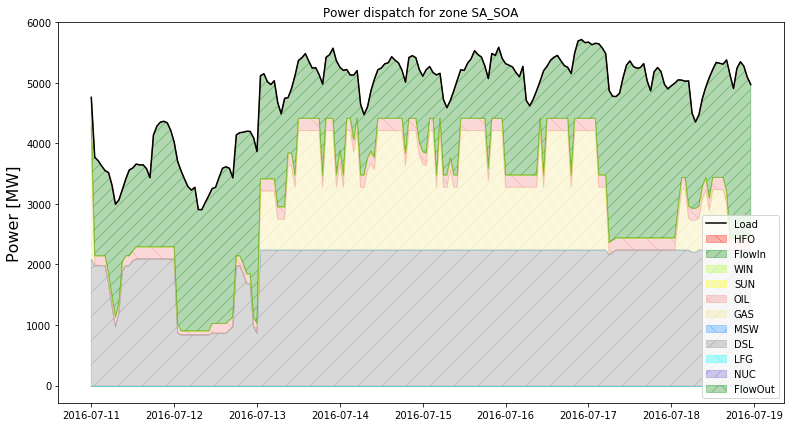

In [12]:
plotdata = post.get_plot_data(inputs, results, 'SA_SOA')
demand = post.get_demand(inputs, 'SA_SOA')
post.plot_dispatch(demand, plotdata, level=None, rng=rng)

#plt.savefig('../Simulations/simulation_all_OneTest - MidJuly - Trade - Sub/Plots/SA_SOA.png',dpi=300,tight_layout='tight_box')


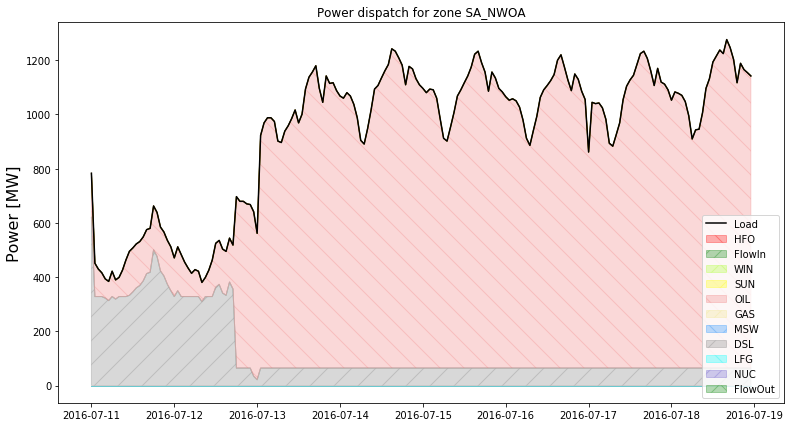

In [13]:
plotdata = post.get_plot_data(inputs, results, 'SA_NWOA')
demand = post.get_demand(inputs, 'SA_NWOA')
post.plot_dispatch(demand, plotdata, level=None, rng=rng)

#plt.savefig('../Simulations/simulation_all_OneTest - MidJuly - Trade - Sub/Plots/SA_NWOA.png',dpi=300,tight_layout='tight_box')


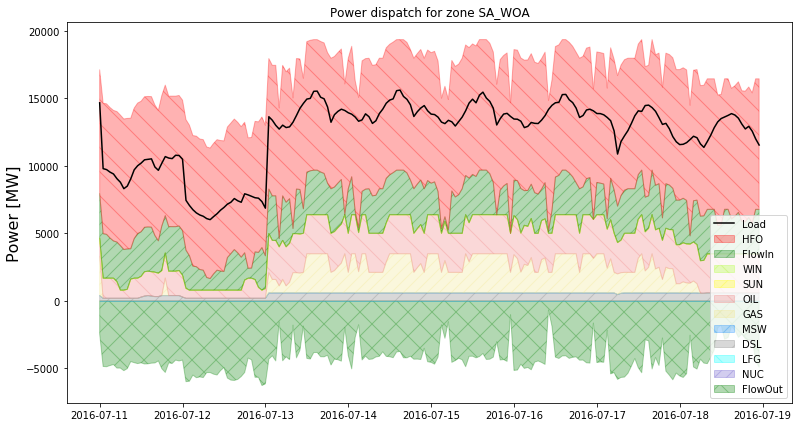

In [14]:
plotdata = post.get_plot_data(inputs, results, 'SA_WOA')
demand = post.get_demand(inputs, 'SA_WOA')
post.plot_dispatch(demand, plotdata, level=None, rng=rng)

#plt.savefig('../Simulations/simulation_all_OneTest - MidJuly - Trade - Sub/Plots/SA_WOA.png',dpi=300,tight_layout='tight_box')


In [15]:
plotdata = post.get_plot_data(inputs, results, 'SA_QASSIM')
demand = post.get_demand(inputs, 'SA_QASSIM')
post.plot_dispatch(demand, plotdata, level=None, rng=rng)

#plt.savefig('../Simulations/simulation_all_OneTest - MidJuly - Trade - Sub/Plots/SA_QASSIM.png',dpi=300,tight_layout='tight_box')


In [16]:
plotdata = post.get_plot_data(inputs, results, 'SA_HAIL')
demand = post.get_demand(inputs, 'SA_HAIL')
post.plot_dispatch(demand, plotdata, level=None, rng=rng)

#plt.savefig('../Simulations/simulation_all_OneTest - MidJuly - Trade - Sub/Plots/SA_HAIL.png',dpi=300,tight_layout='tight_box')


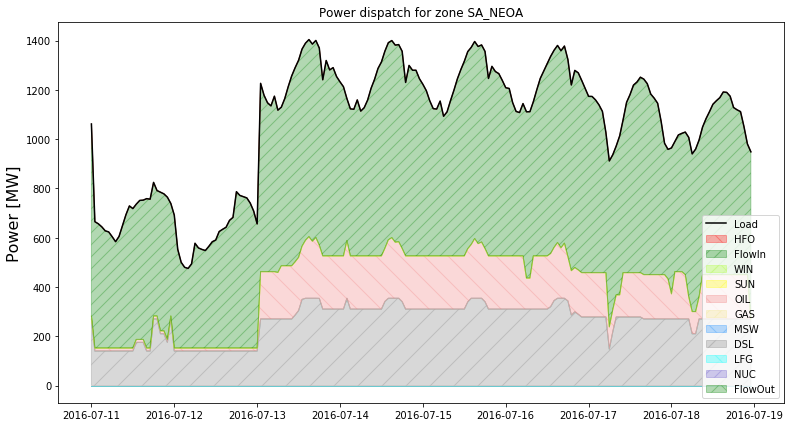

In [17]:
plotdata = post.get_plot_data(inputs, results, 'SA_NEOA')
demand = post.get_demand(inputs, 'SA_NEOA')
post.plot_dispatch(demand, plotdata, level=None, rng=rng)

#plt.savefig('../Simulations/simulation_all_OneTest - MidJuly - Trade - Sub/Plots/SA_NEOA.png',dpi=300,tight_layout='tight_box')


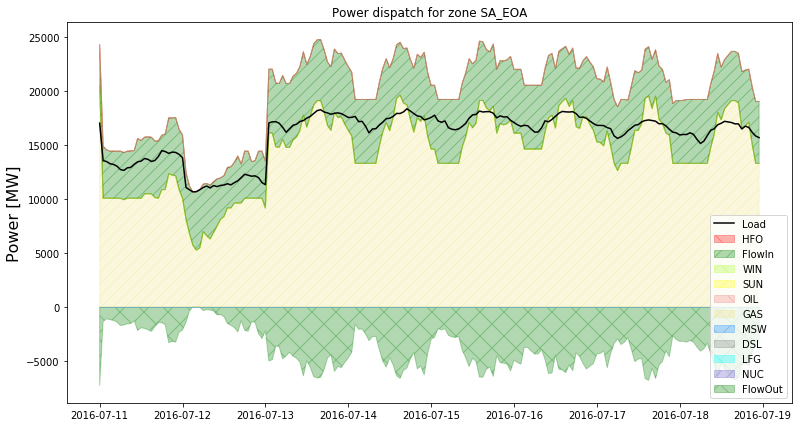

In [18]:
plotdata = post.get_plot_data(inputs, results, 'SA_EOA')
demand = post.get_demand(inputs, 'SA_EOA')
post.plot_dispatch(demand, plotdata, level=None, rng=rng)

#plt.savefig('../Simulations/simulation_all_OneTest - MidJuly - Trade - Sub/Plots/SA_EOA.png',dpi=300,tight_layout='tight_box')


In [19]:
plotdata = post.get_plot_data(inputs, results, 'BA')
demand = post.get_demand(inputs, 'BA')
post.plot_dispatch(demand, plotdata, level=None, rng=rng)

#plt.savefig('../Simulations/simulation_all_OneTest - MidJuly - Trade - Sub/Plots/BA.png',dpi=300,tight_layout='tight_box')


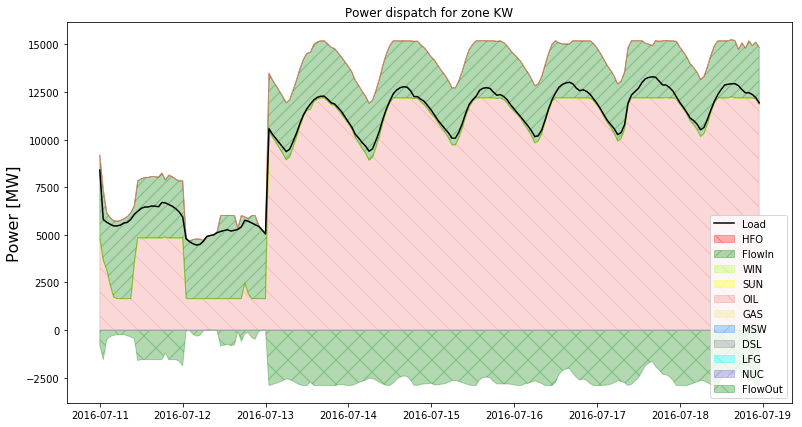

In [20]:
plotdata = post.get_plot_data(inputs, results, 'KW')
demand = post.get_demand(inputs, 'KW')
post.plot_dispatch(demand, plotdata, level=None, rng=rng)

#plt.savefig('../Simulations/simulation_all_OneTest - MidJuly - Trade - Sub/Plots/KW.png',dpi=300,tight_layout='tight_box')


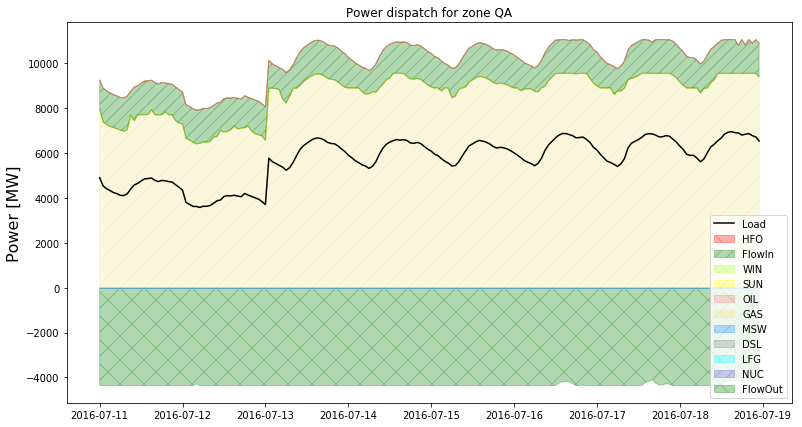

In [21]:
plotdata = post.get_plot_data(inputs, results, 'QA')
demand = post.get_demand(inputs, 'QA')
post.plot_dispatch(demand, plotdata, level=None, rng=rng)

#plt.savefig('../Simulations/simulation_all_OneTest - MidJuly - Trade - Sub/Plots/QA.png',dpi=300,tight_layout='tight_box')



In [ ]:
plotdata = post.get_plot_data(inputs, results, 'OM')
demand = post.get_demand(inputs, 'OM')
post.plot_dispatch(demand, plotdata, level=None, rng=rng)

#plt.savefig('../Simulations/simulation_all_OneTest - MidJuly - Trade - Sub/Plots/OM.png',dpi=300,tight_layout='tight_box')



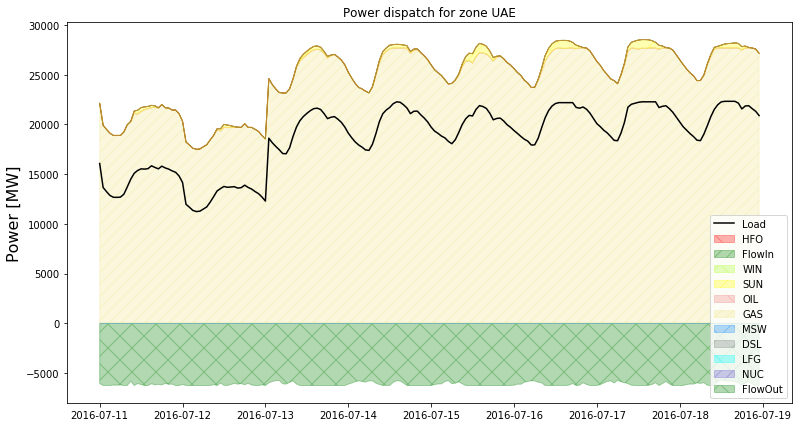

In [23]:
plotdata = post.get_plot_data(inputs, results, 'UAE')
demand = post.get_demand(inputs, 'UAE')
post.plot_dispatch(demand, plotdata, level=None, rng=rng)

#plt.savefig('../Simulations/simulation_all_OneTest - MidJuly - Trade - Sub/Plots/UAE.png',dpi=300,tight_layout='tight_box')



In [21]:
77.3411261347*(1/0.90383675)

85.56979580073505

In [19]:
results['OutputSystemCost'].sum()*(1/0.90383675)   #total output system cost in $

1491248476.2374737

### Analyse the results for each country and provide quantitative indicators:

In [20]:
#Reads the DispaSET results and provides useful general information to stdout
r = ds.get_result_analysis(inputs,results)


Average electricity cost : 77.3411261347 EUR/MWh

Aggregated statistics for the considered area:
Total consumption:17.427276322 TWh
Peak load:109934.728 MW
Net importations:0.0 TWh

Country-Specific values (in TWh or in MW):
             Demand   PeakLoad  NetImports  LoadShedding  Curtailment
SA_EOA     3.056451  18344.334   -1.181746           NaN          NaN
SA_RIYADH  2.166227  14404.277   -0.080631           NaN          NaN
SA_QASSIM  0.407677   2695.942    0.394814           NaN          NaN
SA_HAIL    0.158111   1063.890    0.135361           NaN          NaN
SA_WOA     2.372503  15616.723    0.081488           NaN          NaN
SA_SOA     0.916854   5711.107    0.504137           NaN          NaN
SA_NWOA    0.179421   1275.808    0.000000           NaN          NaN
SA_NEOA    0.203863   1403.988    0.146577           NaN          NaN
OM         0.868577   5811.290    0.000000           NaN          NaN
KW         1.943788  13295.540    0.000000           NaN          NaN
BA  

### Plot the levels of all storage units:

In [25]:
#if 'OutputStorageLevel' in results:
#    results['OutputStorageLevel'].plot()

### Bar plot of the overall generation in each zone by fuel type:

In [ ]:
PPindicators = ds.get_indicators_powerplant(inputs,results)
ax = ds.plot_energy_country_fuel(datain,results,PPindicators)

<IPython.core.display.Javascript object>


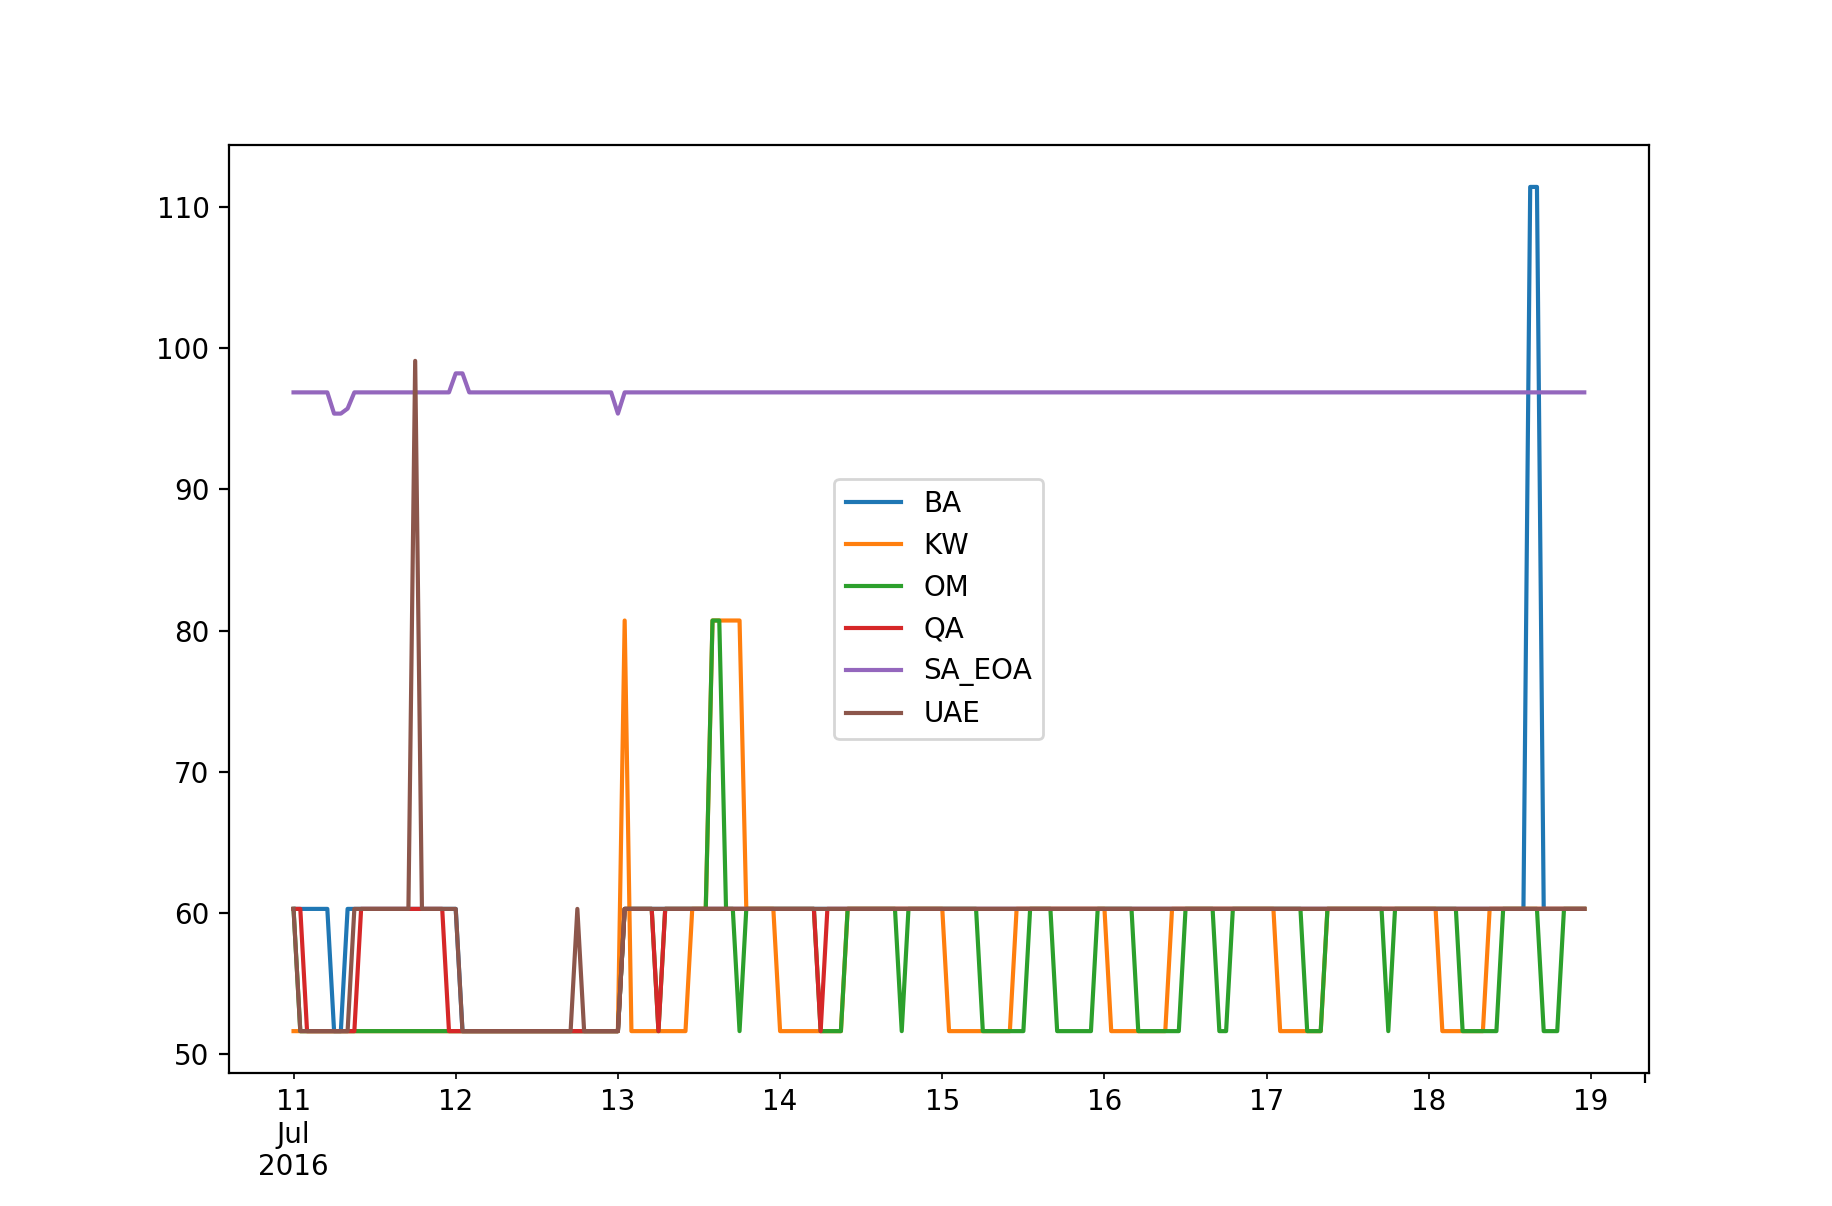

In [23]:
results['ShadowPrice'].drop(columns=['SA_RIYADH', 'SA_QASSIM', 'SA_HAIL', 'SA_WOA', 'SA_SOA', 'SA_NWOA', 'SA_NEOA','SA_NEOA' ]).plot()



In [28]:
results['OutputCurtailedPower'].sum()

Series([], dtype: float64)

In [29]:
results['ShadowPrice'].head(5)

BA        KW         OM        QA    SA_EOA  \
2016-07-11 00:00:00  8.037011  8.037011  17.135143  5.002024  8.037011   
2016-07-11 01:00:00  6.794664  6.794664  17.135143  5.002024  6.794664   
2016-07-11 02:00:00  6.794664  6.794664  17.135143  5.002024  6.794664   
2016-07-11 03:00:00  6.794664  6.794664  17.135143  5.002024  6.794664   
2016-07-11 04:00:00  6.794664  6.794664  17.135143  5.002024  6.794664   

                      SA_HAIL   SA_NEOA   SA_NWOA  SA_QASSIM  SA_RIYADH  \
2016-07-11 00:00:00  8.037011  8.037011  9.141351   8.037011   8.037011   
2016-07-11 01:00:00  6.794664  6.794664  8.794070   6.794664   6.794664   
2016-07-11 02:00:00  6.794664  6.794664  8.794070   6.794664   6.794664   
2016-07-11 03:00:00  6.794664  6.794664  8.794070   6.794664   6.794664   
2016-07-11 04:00:00  6.794664  6.794664  5.947861   6.794664   6.794664   

                       SA_SOA    SA_WOA       UAE  
2016-07-11 00:00:00  8.037011  8.037011  5.002024  
2016-07-11 01:00:00  6.794664  6.794664  5.002024  
2016-07-11 02:00:00  6.794664  6.794664  5.002024  
2016-07-11 03:00:00  6.794664  6.794664  5.002024  
2016-07-11 04:00:00  6.794664  6.794664  5.002024

In [30]:
results['ShadowPrice'].sum().sum()

20114.150915538339

In [31]:
flows = results['OutputFlow']
NetImports = 0
for key in flows:
    if key[:len('RoW')] == 'RoW':
        NetImports -= flows[key].sum()
    elif key[-len('RoW'):] == 'RoW':
        NetImports += flows[key].sum()
NetImports

0

# &&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&

In [32]:
results.keys()

['ShadowPrice',
 'LostLoad_Reserve2D',
 'OutputCommitted',
 'OutputHeatSlack',
 'StarUpCost',
 'LostLoad_RampDown',
 'OutputStorageInput',
 'PowerTradeValue',
 '*',
 'OutputHeat',
 'OperationCost',
 'LostLoad_Reserve2U',
 'LostLoad_MaxPower',
 'status',
 'OutputPower',
 'LostLoad_RampUp',
 'OutputShedLoad',
 'LostLoad_MinPower',
 'OutputCurtailedPower',
 'OutputStorageLevel',
 'OutputSpillage',
 'OutputSystemCost',
 'VariableCost',
 'OutputFlow']

In [33]:
results['OutputPower']

[0] - Ghazlan GT-01  [1000] - Taweelah A1 IWPP  \
2016-07-11 00:00:00           430.000000                1400.000000   
2016-07-11 01:00:00           230.000000                 574.706709   
2016-07-11 02:00:00           230.000000                 574.706709   
2016-07-11 03:00:00           230.000000                 574.706709   
2016-07-11 04:00:00           230.000000                 574.706709   
2016-07-11 05:00:00           230.000000                 574.706709   
2016-07-11 06:00:00           230.000000                 574.706709   
2016-07-11 07:00:00           230.000000                 574.706709   
2016-07-11 08:00:00           230.000000                 574.706709   
2016-07-11 09:00:00           230.000000                 574.706709   
2016-07-11 10:00:00           230.000000                1400.000000   
2016-07-11 11:00:00           230.000000                1400.000000   
2016-07-11 12:00:00           230.000000                 574.706709   
2016-07-11 13:00:00           430.000000                 574.706709   
2016-07-11 14:00:00           430.000000                 574.706709   
2016-07-11 15:00:00           430.000000                1400.000000   
2016-07-11 16:00:00           296.546968                1400.000000   
2016-07-11 17:00:00           230.000000                 574.706709   
2016-07-11 18:00:00           430.000000                1400.000000   
2016-07-11 19:00:00           430.000000                1400.000000   
2016-07-11 20:00:00           430.000000                 574.706709   
2016-07-11 21:00:00           430.000000                 574.706709   
2016-07-11 22:00:00           430.000000                 574.706709   
2016-07-11 23:00:00           430.000000                1400.000000   
2016-07-12 00:00:00           230.000000                 574.706709   
2016-07-12 01:00:00           230.000000                 574.706709   
2016-07-12 02:00:00           230.000000                 574.706709   
2016-07-12 03:00:00           230.000000                 574.706709   
2016-07-12 04:00:00           230.000000                 574.706709   
2016-07-12 05:00:00           230.000000                 574.706709   
...                                  ...                        ...   
2016-07-17 18:00:00           430.000000                1400.000000   
2016-07-17 19:00:00           430.000000                1400.000000   
2016-07-17 20:00:00           430.000000                1400.000000   
2016-07-17 21:00:00           430.000000                1400.000000   
2016-07-17 22:00:00           430.000000                1400.000000   
2016-07-17 23:00:00           430.000000                1400.000000   
2016-07-18 00:00:00           430.000000                1400.000000   
2016-07-18 01:00:00           430.000000                1400.000000   
2016-07-18 02:00:00           430.000000                1400.000000   
2016-07-18 03:00:00           430.000000                1400.000000   
2016-07-18 04:00:00           430.000000                 574.706709   
2016-07-18 05:00:00           430.000000                 574.706709   
2016-07-18 06:00:00           430.000000                 574.706709   
2016-07-18 07:00:00           430.000000                1400.000000   
2016-07-18 08:00:00           430.000000                1400.000000   
2016-07-18 09:00:00           430.000000                1400.000000   
2016-07-18 10:00:00           430.000000                1400.000000   
2016-07-18 11:00:00           430.000000                1400.000000   
2016-07-18 12:00:00           430.000000                1400.000000   
2016-07-18 13:00:00           430.000000                1400.000000   
2016-07-18 14:00:00           430.000000                1400.000000   
2016-07-18 15:00:00           430.000000                1400.000000   
2016-07-18 16:00:00           430.000000                1400.000000   
2016-07-18 17:00:00           430.000000                1400.000000   
2016-07-18 18:00:00           430.000000     

In [34]:
inputs.keys()

['units', 'version', 'config', 'parameters', 'sets']

## Postprocessing functions (interconnection, then single zone, then units)

In [35]:
#Function that converts the dispaset data format into a dictionary of dataframes
datain = ds.ds_to_df(inputs)
datain.keys()

['TimeDownInitial',
 'CHPMaxHeat',
 'RampUpMaximum',
 'StorageProfile',
 'CostFixed',
 'EmissionRate',
 'RampStartUpMaximum',
 'StorageMinimum',
 'PowerInitial',
 'CostStartUp',
 'TimeDownMinimum',
 'Fuel',
 'Nunits',
 'LineNode',
 'Config',
 'PartLoadMin',
 'TimeUpMinimum',
 'EmissionMaximum',
 'OutageFactor',
 'CostLoadShedding',
 'RampShutDownMaximum',
 'Efficiency',
 'Curtailment',
 'Demand',
 'CostRampDown',
 'CostRampUp',
 'StorageOutflow',
 'CostShutDown',
 'FlowMinimum',
 'StorageChargingEfficiency',
 'CHPPowerToHeat',
 'Markup',
 'CostVariable',
 'FuelPrice',
 'PriceTransmission',
 'StorageCapacity',
 'StorageChargingCapacity',
 'PowerCapacity',
 'Reserve',
 'Location',
 'RampDownMaximum',
 'StorageSelfDischarge',
 'CHPPowerLossFactor',
 'StorageInitial',
 'StorageDischargeEfficiency',
 'AvailabilityFactor',
 'sets',
 'FlowMaximum',
 'LoadShedding',
 'Technology',
 'TimeUpInitial',
 'StorageInflow']

In [36]:
#Function that associates each unit to its location from the Dispaset inputs
post.unit_location(inputs)

{'[636] - Taif  GT-04': u'SA_WOA',
 '[803] - Al Manah Power Plant  Unit III': u'OM',
 '[1011] - Umm Al Nar West Power Phase I': u'UAE',
 '[211] - PP10 GT-17': u'SA_RIYADH',
 '[692] - Az Zour North I Power Plant Unit VI': u'KW',
 '[249] - PP9 GT-05': u'SA_RIYADH',
 '[7] - Ghazlan GT-08': u'SA_EOA',
 '[408] - Asir GT-10': u'SA_SOA',
 '[133] - Jouf GT-08': u'SA_NEOA',
 '[675] - Rifaa (Riffa) Gas Power Plant II Unit V': u'BA',
 '[505] - Shoaiba ST-13': u'SA_WOA',
 '[753] - Sabiya Power Plant Unit IV': u'KW',
 '[130] - Jouf GT-05': u'SA_NEOA',
 '[918] - Masdar City Solar Power Plant': u'UAE',
 '[362] - PP7 GT-24': u'SA_RIYADH',
 '[442] - Jazan GT-25': u'SA_SOA',
 '[500] - Shoaiba ST-08': u'SA_WOA',
 '[433] - Jazan GT-16': u'SA_SOA',
 '[483] - Baha GT-05': u'SA_SOA',
 '[70] - Shedgum GT-07': u'SA_EOA',
 '[611] - Makkah GT-05': u'SA_WOA',
 '[909] - Ras Abu Fontas - B Power Plant Block V': u'QA',
 '[816] - Dibba Internal Combustion Power Plant': u'OM',
 '[988] - Khorfakkan Power Plant': u'UAE'

In [37]:
#Function that associates each unit to its fuel from the Dispaset inputs
post.unit_fuel(inputs)

{'[636] - Taif  GT-04': 'DSL',
 '[803] - Al Manah Power Plant  Unit III': 'GAS',
 '[1011] - Umm Al Nar West Power Phase I': 'GAS',
 '[211] - PP10 GT-17': 'OIL',
 '[692] - Az Zour North I Power Plant Unit VI': 'GAS',
 '[249] - PP9 GT-05': 'GAS',
 '[7] - Ghazlan GT-08': 'GAS',
 '[408] - Asir GT-10': 'DSL',
 '[133] - Jouf GT-08': 'OIL',
 '[675] - Rifaa (Riffa) Gas Power Plant II Unit V': 'GAS',
 '[505] - Shoaiba ST-13': 'HFO',
 '[753] - Sabiya Power Plant Unit IV': 'OIL',
 '[130] - Jouf GT-05': 'OIL',
 '[918] - Masdar City Solar Power Plant': 'SUN',
 '[362] - PP7 GT-24': 'GAS',
 '[442] - Jazan GT-25': 'DSL',
 '[500] - Shoaiba ST-08': 'HFO',
 '[433] - Jazan GT-16': 'DSL',
 '[483] - Baha GT-05': 'DSL',
 '[70] - Shedgum GT-07': 'GAS',
 '[611] - Makkah GT-05': 'DSL',
 '[909] - Ras Abu Fontas - B Power Plant Block V': 'GAS',
 '[816] - Dibba Internal Combustion Power Plant': 'OIL',
 '[988] - Khorfakkan Power Plant': 'GAS',
 '[11] - Qurrayah ST-04': 'GAS',
 '[268] - PP9 GT-20': 'GAS',
 '[735] - 

In [38]:
inputs['units'].groupby(['Fuel']).sum()['PowerCapacity']

Fuel
DSL      6936.694000
GAS    137226.542328
HFO      9666.000000
LFG        13.000000
MSW         1.000000
OIL     41003.209500
SUN      1406.208000
WIN         0.850000
Name: PowerCapacity, dtype: float64

In [39]:
inputs['units'].groupby(['Technology']).sum()['PowerCapacity']

Technology
COMC    84260.700000
CPV         2.401000
CSP       300.110000
GTUR    53720.748050
ICEN    19117.897778
LFGG       13.000000
PHOT     1103.697000
STUR    37734.100000
WTON        0.850000
Name: PowerCapacity, dtype: float64

In [40]:
datain['Demand']['DA'].head(5)

SA_EOA  SA_RIYADH  SA_QASSIM  SA_HAIL     SA_WOA  \
2016-07-11 00:00:00  17013.552  11411.259   2151.389  829.677  14671.733   
2016-07-11 01:00:00  13550.500   7447.561   1412.687  534.267   9799.649   
2016-07-11 02:00:00  13465.141   7359.834   1396.284  527.773   9726.174   
2016-07-11 03:00:00  13261.719   7236.205   1373.226  518.575   9539.679   
2016-07-11 04:00:00  13197.557   7077.935   1343.817  506.706   9403.216   

                       SA_SOA  SA_NWOA   SA_NEOA       OM       KW       BA  \
2016-07-11 00:00:00  4757.780  782.846  1061.479  4434.76  8400.10  2064.48   
2016-07-11 01:00:00  3767.989  451.082   664.887  3645.52  5803.16  1778.99   
2016-07-11 02:00:00  3710.489  429.438   656.284  3589.39  5660.44  1759.78   
2016-07-11 03:00:00  3624.121  415.812   643.973  3455.63  5557.68  1714.81   
2016-07-11 04:00:00  3547.738  393.183   627.854  3346.19  5468.15  1645.56   

                          QA       UAE  
2016-07-11 00:00:00  4904.95  16067.30  
2016-07-11 01:00:00  4534.06  13655.74  
2016-07-11 02:00:00  4415.17  13232.91  
2016-07-11 03:00:00  4330.57  12851.31  
2016-07-11 04:00:00  4241.87  12671.61

In [41]:
TotalLoadEachCountry = datain['Demand']['DA'].sum()    #total consumption in each country in MWh
TotalLoadEachCountry

SA_EOA       3056450.970
SA_RIYADH    2166226.653
SA_QASSIM     407677.022
SA_HAIL       158110.722
SA_WOA       2372503.282
SA_SOA        916854.120
SA_NWOA       179420.832
SA_NEOA       203863.006
OM            868576.735
KW           1943788.190
BA            470780.040
QA           1095268.760
UAE          3587755.990
dtype: float64

In [42]:
TotalLoad = TotalLoadEachCountry.sum()     #total consumption in MWh
TotalLoad

17427276.321999993

In [43]:
results['OutputSystemCost'].sum()   #total output system cost in EUR

105573815.24087946

In [44]:
#This function sorts the power generation curves of the different units by technology
post.aggregate_by_fuel(results['OutputPower'], inputs, SpecifyFuels=None).head(5)

BIO           GAS  HRD  LIG  NUC           OIL  PEA  SUN  \
2016-07-11 00:00:00    0  65981.624980    0    0    0  10020.304791    0  0.0   
2016-07-11 01:00:00    0  45149.888667    0    0    0   9583.524677    0  0.0   
2016-07-11 02:00:00    0  44552.096009    0    0    0   9064.389677    0  0.0   
2016-07-11 03:00:00    0  43952.196804    0    0    0   8258.552677    0  0.0   
2016-07-11 04:00:00    0  43574.396872    0    0    0   7590.131214    0  0.0   

                     WAT       WIN  WST  OTH          DSL        HFO  MSW  \
2016-07-11 00:00:00    0  0.006967    0    0  3377.335500  9167.6148    0   
2016-07-11 01:00:00    0  0.193438    0    0  2642.067257  9666.0000    0   
2016-07-11 02:00:00    0  0.136096    0    0  2642.067257  9666.0000    0   
2016-07-11 03:00:00    0  0.075301    0    0  2642.067257  9666.0000    0   
2016-07-11 04:00:00    0  0.035232    0    0  2636.404719  9666.0000    0   

                          LFG  
2016-07-11 00:00:00  4.417962  
2016-07-11 01:00:00  4.417962  
2016-07-11 02:00:00  4.417962  
2016-07-11 03:00:00  4.417962  
2016-07-11 04:00:00  4.417962

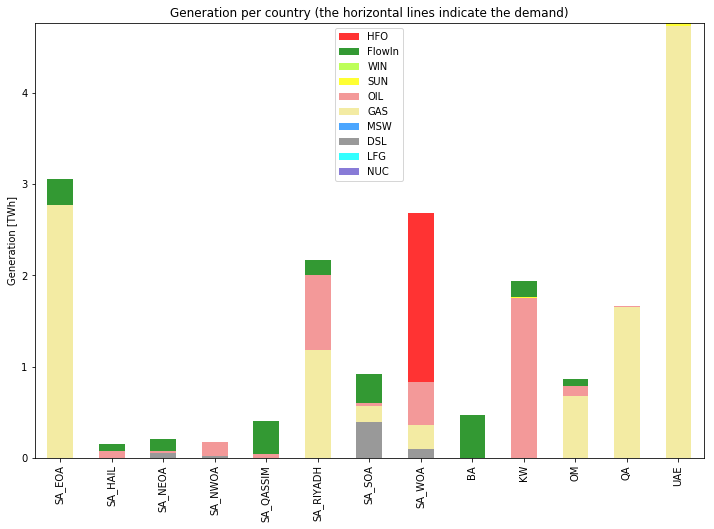

In [45]:
PPindicators = ds.get_indicators_powerplant(inputs,results)

#Plots the generation for each country, disaggregated by fuel type
ax = ds.plot_energy_country_fuel(datain,results,PPindicators)

In [46]:
results['OutputFlow'].head(5)

BA -> KW  BA -> SA_EOA    KW -> BA  KW -> SA_EOA  \
2016-07-11 00:00:00  1360.000000        0.0000    0.000000    790.434791   
2016-07-11 01:00:00   686.744566      264.5855    0.000000   1550.000000   
2016-07-11 02:00:00     0.000000     1360.0000  389.459934    119.024500   
2016-07-11 03:00:00     0.000000     1360.0000  344.489934      0.000000   
2016-07-11 04:00:00     0.000000     1360.0000  275.239934      0.000000   

                     QA -> BA  QA -> KW  QA -> SA_EOA  SA_EOA -> BA  \
2016-07-11 00:00:00    1360.0    1500.0        1500.0    694.159934   
2016-07-11 01:00:00    1360.0    1500.0        1500.0      0.000000   
2016-07-11 02:00:00    1360.0    1500.0        1500.0      0.000000   
2016-07-11 03:00:00    1360.0    1500.0        1500.0      0.000000   
2016-07-11 04:00:00    1360.0    1500.0        1500.0      0.000000   

                     SA_EOA -> KW  SA_EOA -> SA_RIYADH  SA_HAIL -> SA_NEOA  \
2016-07-11 00:00:00        0.0000          6551.884922             779.479   
2016-07-11 01:00:00        0.0000          1330.085500             512.887   
2016-07-11 02:00:00        0.0000          1079.883500             504.284   
2016-07-11 03:00:00      525.4565           638.824500             491.973   
2016-07-11 04:00:00     1018.1315           210.311500             475.854   

                     SA_QASSIM -> SA_HAIL  SA_QASSIM -> SA_RIYADH  \
2016-07-11 00:00:00              1128.446                  0.0000   
2016-07-11 01:00:00               867.154               1047.4755   
2016-07-11 02:00:00               852.057               1156.6590   
2016-07-11 03:00:00               830.548               1201.2260   
2016-07-11 04:00:00               802.560               1258.6230   

                     SA_QASSIM -> SA_WOA  SA_RIYADH -> SA_EOA  \
2016-07-11 00:00:00                  0.0                  0.0   
2016-07-11 01:00:00                  0.0                  0.0   
2016-07-11 02:00:00                  0.0                  0.0   
2016-07-11 03:00:00                  0.0                  0.0   
2016-07-11 04:00:00                  0.0                  0.0   

                     SA_RIYADH -> SA_QASSIM  SA_RIYADH -> SA_WOA  \
2016-07-11 00:00:00             1045.855422            3300.0000   
2016-07-11 01:00:00                0.000000            3300.0000   
2016-07-11 02:00:00                0.000000            3246.7085   
2016-07-11 03:00:00                0.000000            2973.8455   
2016-07-11 04:00:00                0.000000            2760.9995   

                     SA_WOA -> SA_QASSIM  SA_WOA -> SA_RIYADH  \
2016-07-11 00:00:00          1952.037578                  0.0   
2016-07-11 01:00:00          3222.316500                  0.0   
2016-07-11 02:00:00          3300.000000                  0.0   
2016-07-11 03:00:00          3300.000000                  0.0   
2016-07-11 04:00:00          3300.000000                  0.0   

                     SA_WOA -> SA_SOA  UAE -> BA  UAE -> KW  UAE -> OM  \
2016-07-11 00:00:00        494.664722     1360.0     1500.0      400.0   
2016-07-11 01:00:00       1628.034500     1360.0     1500.0      400.0   
2016-07-11 02:00:00       1570.534500     1360.0     1500.0      400.0   
2016-07-11 03:00:00       1484.166500     1360.0     1500.0      400.0   
2016-07-11 04:00:00       1407.783500     1360.0     1500.0      400.0   

                       UAE -> QA  UAE -> SA_EOA  
2016-07-11 00:00:00  1307.375022         1500.0  
2016-07-11 01:00:00  1500.000000         1500.0  
2016-07-11 02:00:00  1500.000000         1500.0  
2016-07-11 03:00:00  1500.000000         1500.0  
2016-07-11 04:00:00  1461.223340         1500.0

In [229]:
NewOutputFlow = results['OutputFlow'].copy()
OriginalColumns = []
reverseindex = []
for j,column in enumerate(NewOutputFlow):
    A = column.split(' -> ')
    OriginalColumns.append(A)
    B = list(reversed(A))
    if B in OriginalColumns:
        reverseindex.append(j)
        D = [i for i, C in enumerate(OriginalColumns) if C==B]
        D = int(''.join(map(str,D)))
        NewOutputFlow.iloc[:,D] = NewOutputFlow.iloc[:,D] - NewOutputFlow.iloc[:,j]
NewOutputFlow = NewOutputFlow.drop(NewOutputFlow.columns[reverseindex], axis=1).copy()
NewOutputFlow

BA -> KW  BA -> SA_EOA  KW -> SA_EOA     QA -> BA  \
2016-07-11 00:00:00  1360.000000   -694.159934    790.434791  1360.000000   
2016-07-11 01:00:00   686.744566    264.585500   1550.000000  1360.000000   
2016-07-11 02:00:00  -389.459934   1360.000000    119.024500  1360.000000   
2016-07-11 03:00:00  -344.489934   1360.000000   -525.456500  1360.000000   
2016-07-11 04:00:00  -275.239934   1360.000000  -1018.131500  1360.000000   
2016-07-11 05:00:00  -247.359934   1360.000000  -1061.594255  1360.000000   
2016-07-11 06:00:00  -239.759934   1360.000000  -1101.934255  1360.000000   
2016-07-11 07:00:00  -226.799934   1360.000000  -1196.774255  1360.000000   
2016-07-11 08:00:00  -303.609934   1360.000000  -1304.784255  1360.000000   
2016-07-11 09:00:00  -354.184878   1360.000000  -1517.986541  1360.000000   
2016-07-11 10:00:00  -399.273100   1360.000000     52.678106  1360.000000   
2016-07-11 11:00:00   -50.119336    975.196300   1550.000000  1360.000000   
2016-07-11 12:00:00   101.555849    787.404580   1550.000000  1360.000000   
2016-07-11 13:00:00   176.987471    702.378267   1550.000000  1360.000000   
2016-07-11 14:00:00   178.196482    713.223723   1550.000000  1360.000000   
2016-07-11 15:00:00   228.744075    690.052863   1550.000000  1360.000000   
2016-07-11 16:00:00   223.755422    680.668098   1550.000000  1360.000000   
2016-07-11 17:00:00   192.727986    759.312277   1550.000000  1360.000000   
2016-07-11 18:00:00   415.565209    486.414857   1550.000000  1360.000000   
2016-07-11 19:00:00  -413.439934   1360.000000    788.962500  1360.000000   
2016-07-11 20:00:00   304.335209    634.934857   1550.000000  1360.000000   
2016-07-11 21:00:00   219.165209    730.544857   1550.000000  1360.000000   
2016-07-11 22:00:00    89.925209    854.824857   1550.000000  1360.000000   
2016-07-11 23:00:00   -84.664791   1030.454857   1550.000000  1360.000000   
2016-07-12 00:00:00  -335.354791   1312.814857   1550.000000  1360.000000   
2016-07-12 01:00:00   -35.249934   1360.000000   -172.964255  1360.000000   
2016-07-12 02:00:00    24.830066   1360.000000     37.725745  1360.000000   
2016-07-12 03:00:00    96.920066   1360.000000    217.955745  1360.000000   
2016-07-12 04:00:00   132.920066   1360.000000    320.355745  1360.000000   
2016-07-12 05:00:00   122.650066   1360.000000    275.605745  1360.000000   
...                          ...           ...           ...          ...   
2016-07-17 18:00:00  -540.589941    394.703637   1550.000000  1360.000000   
2016-07-17 19:00:00  -763.447189    673.169866   1550.000000  1360.000000   
2016-07-17 20:00:00  -791.973696    634.193200   1550.000000  1360.000000   
2016-07-17 21:00:00  -896.555089    741.211541   1550.000000  1302.782163   
2016-07-17 22:00:00 -1083.354791    986.604857   1550.000000  1360.000000   
2016-07-17 23:00:00 -1360.000000   1262.040066   1550.000000  1360.000000   
2016-07-18 00:00:00 -1360.000000   1248.220066   1550.000000  1360.000000   
2016-07-18 01:00:00 -1360.000000   1279.590066   1550.000000  1360.000000   
2016-07-18 02:00:00 -1360.000000   1355.310066   1550.000000  1360.000000   
2016-07-18 03:00:00 -1302.709934   1360.000000   1550.000000  1360.000000   
2016-07-18 04:00:00 -1237.439934   1360.000000   1550.000000  1360.000000   
2016-07-18 05:00:00 -1169.499934   1360.000000   1550.000000  1360.000000   
2016-07-18 06:00:00 -1095.019297   1360.000000   1550.000000  1360.000000   
2016-07-18 07:00:00 -1122.558586   1360.000000   1550.000000  1360.000000   
2016-07-18 08:00:00 -1207.076283   1360.000000   1550.000000  1360.000000   
2016-07-18 09:00:00 -1314.094692   1360.000000   1550.000000  1360.000000   
2016-07-18 10:00:00 -1360.000000   1279.250767   1550.000000  1360.000000   
2016-07-18 11:00:00 -1268.486640   1130.276771   1550.000000  1360.000000   
2016-07-18 12:00:00  -995.845854    851.173943   1550.000000  1360.000000   
2016-07-18 13:00:00  -768.968394   -120.803475   1550.000000  1207.926424   
2016-07-18 14:00:00 

<IPython.core.display.Javascript object>


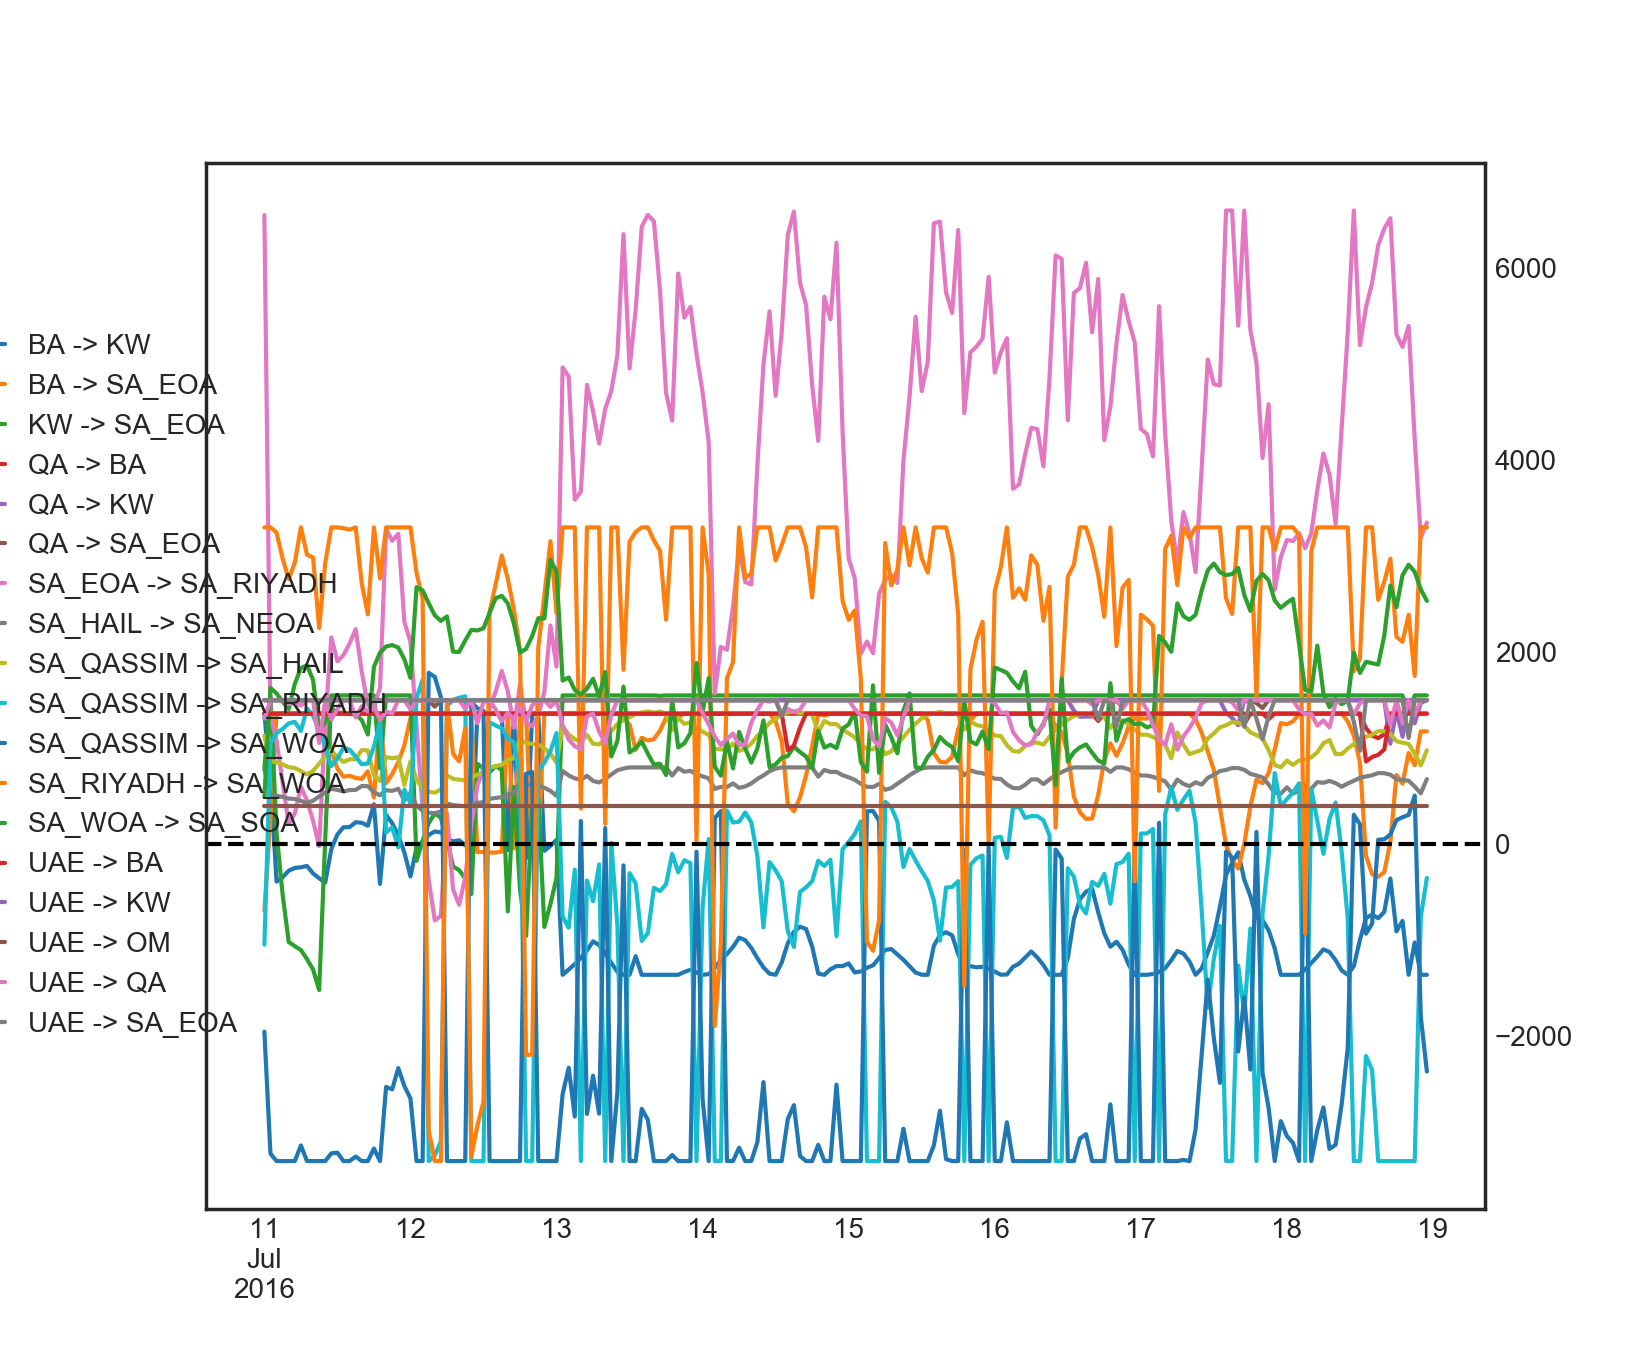

In [287]:
ax = NewOutputFlow.plot(kind='line', title=None, legend=True)
ax.legend(loc='center left', bbox_to_anchor=(-0.22, 0.5))
ax.axhline(y=0, xmin=0, xmax=1, color='k', linestyle='--')
ax.yaxis.tick_right()

In [260]:
columns = []
for i,column in enumerate(NewOutputFlow):
    [from_node, to_node] = column.split('->')
    if (from_node.strip()[0:2] == 'SA' and to_node.strip()[0:2] == 'SA'):
        columns.append(i)
GCCFlows = NewOutputFlow.drop(NewOutputFlow.columns[columns], axis=1).copy()
ax = GCCFlows.plot(kind='line', title=None, legend=True)
ax.legend(loc='center left', bbox_to_anchor=(0.9, 0.5))
ax.axhline(y=0, xmin=0, xmax=1, color='k', linestyle='--')

<IPython.core.display.Javascript object>

In [288]:
results['OutputFlow'].sum()

BA -> KW                   15604.533217
BA -> SA_EOA              203383.288880
KW -> BA                  166439.898898
KW -> SA_EOA              251231.494151
QA -> BA                  259858.297610
QA -> KW                  285569.105404
QA -> SA_EOA              287807.018902
SA_EOA -> BA                2818.711849
SA_EOA -> KW               13234.917427
SA_EOA -> SA_RIYADH       728764.289442
SA_HAIL -> SA_NEOA        125047.349743
SA_QASSIM -> SA_HAIL      204425.334767
SA_QASSIM -> SA_RIYADH     53654.247324
SA_QASSIM -> SA_WOA        15823.164223
SA_RIYADH -> SA_EOA         3377.308347
SA_RIYADH -> SA_QASSIM    160250.081280
SA_RIYADH -> SA_WOA       490055.177859
SA_WOA -> SA_QASSIM       475783.381669
SA_WOA -> SA_RIYADH        31491.374721
SA_WOA -> SA_SOA          315487.683478
UAE -> BA                 258507.966316
UAE -> KW                 288000.000000
UAE -> OM                  76800.000000
UAE -> QA                 267949.540131
UAE -> SA_EOA             285126.411664


In [51]:
#Volume of total traded power
results['OutputFlow'].sum().sum()

5266490.5773013365

In [52]:
post.Local_generation_minus_demand(inputs, results).head(5)

SA_EOA  SA_RIYADH  SA_QASSIM  SA_HAIL     SA_WOA  \
2016-07-11 00:00:00  3455.610065 -2206.0295  -1869.447 -348.967  -853.2977   
2016-07-11 01:00:00 -3484.500000   922.4390  -1307.687 -354.267  1550.3510   
2016-07-11 02:00:00 -3399.141000  1010.1660  -1291.284 -347.773  1623.8260   
2016-07-11 03:00:00 -3195.719000  1133.7950  -1268.226 -338.575  1810.3210   
2016-07-11 04:00:00 -3131.557000  1292.0650  -1238.817 -326.706  1946.7840   

                          SA_SOA  SA_NWOA  SA_NEOA     OM           KW  \
2016-07-11 00:00:00  -494.664722      0.0 -779.479 -400.0 -3569.565209   
2016-07-11 01:00:00 -1628.034500      0.0 -512.887 -400.0 -2136.744566   
2016-07-11 02:00:00 -1570.534500      0.0 -504.284 -400.0 -2491.515566   
2016-07-11 03:00:00 -1484.166500      0.0 -491.973 -400.0 -3180.966566   
2016-07-11 04:00:00 -1407.783500      0.0 -475.854 -400.0 -3742.891566   

                              BA           QA          UAE  
2016-07-11 00:00:00 -2054.159934  3052.624978  6067.375022  
2016-07-11 01:00:00 -1768.669934  2860.000000  6260.000000  
2016-07-11 02:00:00 -1749.459934  2860.000000  6260.000000  
2016-07-11 03:00:00 -1704.489934  2860.000000  6260.000000  
2016-07-11 04:00:00 -1635.239934  2898.776660  6221.223340

In [53]:
post.get_nodes_generation_cost(inputs, results)

SA_EOA     SA_RIYADH    SA_QASSIM      SA_HAIL  \
2016-07-11 00:00:00  147098.498607  52896.283322  8546.610543  3505.472014   
2016-07-11 01:00:00   58682.100214  43088.396024   777.223220  1312.604953   
2016-07-11 02:00:00   58682.100214  43088.396024   777.223220  1312.604953   
2016-07-11 03:00:00   58682.100214  43088.396024   777.223220  1312.604953   
2016-07-11 04:00:00   58682.100214  43088.396024   777.223220  1312.604953   
2016-07-11 05:00:00   58682.100214  43088.396024   777.223220  1312.604953   
2016-07-11 06:00:00   58682.100214  43088.396024   777.223220  1312.604953   
2016-07-11 07:00:00   57868.214365  39464.523346   777.223220  1312.604953   
2016-07-11 08:00:00   58682.100214  42391.368770   777.223220  1312.604953   
2016-07-11 09:00:00   58682.100214  43088.396024   777.223220  1312.604953   
2016-07-11 10:00:00   58682.100214  43088.396024   777.223220  1312.604953   
2016-07-11 11:00:00   58682.100214  43484.563798   777.223220  1325.946531   
2016-07-11 12:00:00   58682.100214  43891.622660   777.223220  1653.820546   
2016-07-11 13:00:00   61578.696851  43891.622660   816.672595  2018.716321   
2016-07-11 14:00:00   61745.130193  44186.214064  1072.238362  2018.716321   
2016-07-11 15:00:00   61578.696851  43891.622660   915.153988  2018.716321   
2016-07-11 16:00:00   59162.291422  43891.622660   777.223220  1653.820546   
2016-07-11 17:00:00   58682.100214  43891.622660   777.223220  1653.820546   
2016-07-11 18:00:00   64517.783278  56341.868697  2088.594061  3505.472014   
2016-07-11 19:00:00   64517.783278  44814.058266  2088.594061  3505.472014   
2016-07-11 20:00:00   77094.468337  44482.337600  1072.238362  2018.716321   
2016-07-11 21:00:00   75447.665426  44482.337600  1072.238362  2018.716321   
2016-07-11 22:00:00   74870.642635  44451.275073  1072.238362  2018.716321   
2016-07-11 23:00:00   64517.783278  44814.058266  1619.989127  3132.195542   
2016-07-12 00:00:00   58682.100214  43891.622660   777.223220  1653.820546   
2016-07-12 01:00:00   46670.140048  31063.704272   777.223220  1312.604953   
2016-07-12 02:00:00   40076.529487  30381.140029   777.223220  1312.604953   
2016-07-12 03:00:00   34476.616325  30381.140029   777.223220  1312.604953   
2016-07-12 04:00:00   32235.538956  30381.140029   777.223220  1312.604953   
2016-07-12 05:00:00   33258.835456  30381.140029   777.223220  1312.604953   
...                            ...           ...          ...          ...   
2016-07-17 18:00:00  114802.410467  65216.028997  2088.594061  3505.472014   
2016-07-17 19:00:00  111776.900524  72080.581583  2088.594061  3505.472014   
2016-07-17 20:00:00  104652.646930  72080.581583  2088.594061  3505.472014   
2016-07-17 21:00:00  103092.664709  57613.962499  2088.594061  3505.472014   
2016-07-17 22:00:00   82149.017245  57613.962499  2088.594061  3505.472014   
2016-07-17 23:00:00   82149.017245  57613.962499  2088.594061  3505.472014   
2016-07-18 00:00:00   82149.017245  56176.179494  2088.594061  3505.472014   
2016-07-18 01:00:00   82149.017245  57613.962499  2088.594061  3505.472014   
2016-07-18 02:00:00   82149.017245  57613.962499  2088.594061  3505.472014   
2016-07-18 03:00:00   82149.017245  57613.962499  2088.594061  3505.472014   
2016-07-18 04:00:00   82149.017245  57613.962499  2088.594061  3505.472014   
2016-07-18 05:00:00   82149.017245  57077.732473  2088.594061  3505.472014   
2016-07-18 06:00:00   82149.017245  51925.635525  1072.238362  2387.699557   
2016-07-18 07:00:00   82149.017245  52284.348283  1072.238362  2387.699557   
2016-07-18 08:00:00   82149.017245  57484.261675  2088.594061  3505.472014   
2016-07-18 09:00:00   94874.454019  57613.962499  2088.594061  3505.472014   
2016-07-18 10:00:00  103871.692873  57613.962499  2088.594061  3505.472014   
2016-07-18 11:00:00  120931.368176  57613.962499  2088.594061  3505.472014   
2016-07-18 12:00:00  114506.217400  72980.581583  2088.594061  3505.472014   
2016-07-18 13:00:00  122706.670696  72080.581583  

In [54]:
#Function that computes the balance of the imports/exports of a given zone
# (NetImports)
post.get_imports(results['OutputFlow'], 'QA')  

-565284.88178435038

In [55]:
#Get the load curve, the residual load curve, and the net residual load curve of a specific country
#Load:               Load curve of the specified country
#ResidualLoad:       Load minus the production of variable renewable sources
#NetResidualLoad:    Residual netted from the interconnections with neightbouring countries
post.get_load_data(datain,'QA').head(5)

Load  ResidualLoad  NetResidualLoad
2016-07-11 00:00:00  4904.95   4904.943033      4904.943033
2016-07-11 01:00:00  4534.06   4533.866562      4533.866562
2016-07-11 02:00:00  4415.17   4415.033904      4415.033904
2016-07-11 03:00:00  4330.57   4330.494699      4330.494699
2016-07-11 04:00:00  4241.87   4241.834768      4241.834768

In [56]:
#Get the load curve and the residual load curve of a specific country
post.get_demand(inputs, 'QA').head(5)

2016-07-11 00:00:00    4904.95
2016-07-11 01:00:00    4534.06
2016-07-11 02:00:00    4415.17
2016-07-11 03:00:00    4330.57
2016-07-11 04:00:00    4241.87
Freq: H, Name: QA, dtype: float64

In [57]:
#This function filters the dispaset Output Power dataframe by country
post.filter_by_country(results['OutputPower'], inputs, 'QA').head(5)

[894] - Qatar Foundation Solar PV Park  \
2016-07-11 00:00:00                                     0.0   
2016-07-11 01:00:00                                     0.0   
2016-07-11 02:00:00                                     0.0   
2016-07-11 03:00:00                                     0.0   
2016-07-11 04:00:00                                     0.0   

                     [895] - Qatar Foundation Solar PV Park - 1  \
2016-07-11 00:00:00                                         0.0   
2016-07-11 01:00:00                                         0.0   
2016-07-11 02:00:00                                         0.0   
2016-07-11 03:00:00                                         0.0   
2016-07-11 04:00:00                                         0.0   

                     [896] - Qatar Foundation Solar PV Park - 2  \
2016-07-11 00:00:00                                         0.0   
2016-07-11 01:00:00                                         0.0   
2016-07-11 02:00:00                                         0.0   
2016-07-11 03:00:00                                         0.0   
2016-07-11 04:00:00                                         0.0   

                     [897] - QSTec - Ras Laffan Industrial City Solar Farm  \
2016-07-11 00:00:00                                                0.0       
2016-07-11 01:00:00                                                0.0       
2016-07-11 02:00:00                                                0.0       
2016-07-11 03:00:00                                                0.0       
2016-07-11 04:00:00                                                0.0       

                     [898] - Qatar National Convention Center Solar PV Park  \
2016-07-11 00:00:00                                                0.0        
2016-07-11 01:00:00                                                0.0        
2016-07-11 02:00:00                                                0.0        
2016-07-11 03:00:00                                                0.0        
2016-07-11 04:00:00                                                0.0        

                     [899] - Mesaieed A Combined Cycle Power Plant  \
2016-07-11 00:00:00                                    1075.556678   
2016-07-11 01:00:00                                    1116.274288   
2016-07-11 02:00:00                                     997.384288   
2016-07-11 03:00:00                                     825.114632   
2016-07-11 04:00:00                                     825.114632   

                     [901] - Qatalum Combined Cycle Power Plant  \
2016-07-11 00:00:00                                      1350.0   
2016-07-11 01:00:00                                      1350.0   
2016-07-11 02:00:00                                      1350.0   
2016-07-11 03:00:00                                      1350.0   
2016-07-11 04:00:00                                      1350.0   

                     [902] - Qatalum IC Power Plant  \
2016-07-11 00:00:00                             0.0   
2016-07-11 01:00:00                             0.0   
2016-07-11 02:00:00                             0.0   
2016-07-11 03:00:00                             0.0   
2016-07-11 04:00:00                             0.0   

                     [903] - Ras Abu Fontas - A Power Plant  \
2016-07-11 00:00:00                              204.020882   
2016-07-11 01:00:00                              204.020882   
2016-07-11 02:00:00                              204.020882   
2016-07-11 03:00:00                              204.020882   
2016-07-11 04:00:00                              204.020882   

                     [904] - Ras Abu Fontas - B Power Plant  \
2016-07-11 00:00:00                              249.997418   
2016-07-11 01:00:00                              249.997418   
2016-07-11 02:00:00                              249.997418   
2016-07-11 03:00:00                              249.997418   
2016-07-11 04:00:00                        

In [58]:
#Function that reads the results dataframe of a DispaSET simulation and extract the dispatch data spedific to one country
plotdata = post.get_plot_data(inputs, results, 'QA')
plotdata.head(5)

FlowOut  NUC  LFG  DSL  MSW          GAS  OIL  SUN  WIN  \
2016-07-11 00:00:00  -4360.0    0    0    0    0  7957.574978  0.0  0.0    0   
2016-07-11 01:00:00  -4360.0    0    0    0    0  7394.060000  0.0  0.0    0   
2016-07-11 02:00:00  -4360.0    0    0    0    0  7275.170000  0.0  0.0    0   
2016-07-11 03:00:00  -4360.0    0    0    0    0  7190.570000  0.0  0.0    0   
2016-07-11 04:00:00  -4360.0    0    0    0    0  7140.646660  0.0  0.0    0   

                          FlowIn  HFO  
2016-07-11 00:00:00  1307.375022    0  
2016-07-11 01:00:00  1500.000000    0  
2016-07-11 02:00:00  1500.000000    0  
2016-07-11 03:00:00  1500.000000    0  
2016-07-11 04:00:00  1461.223340    0

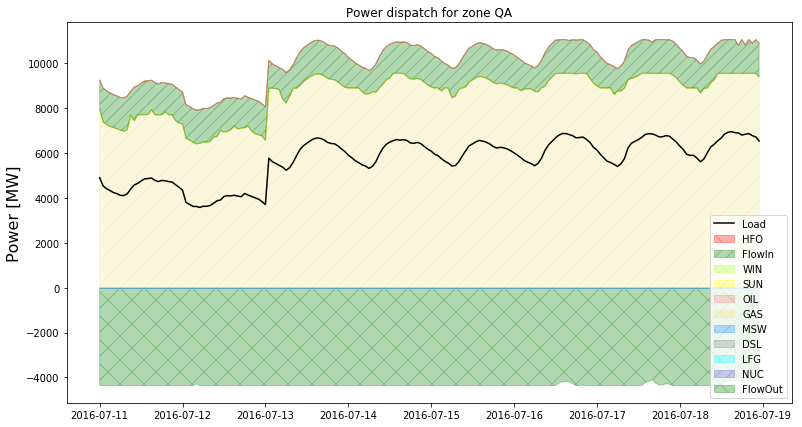

In [59]:
plotdata = post.get_plot_data(inputs, results, 'QA')
demand = post.get_demand(inputs, 'QA')

#Function that plots the dispatch data and the reservoir level as a cumulative sum
post.plot_dispatch(demand, plotdata, level=None, rng=rng)

True

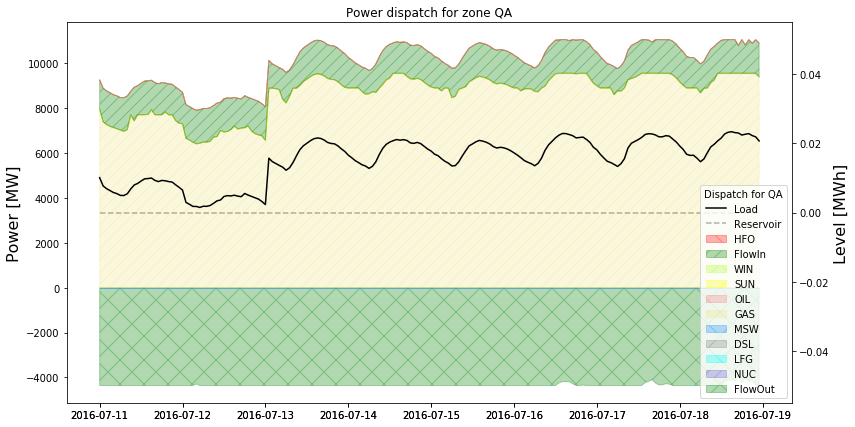

In [60]:
#Generates plots from the dispa-SET results for one spedific country
post.plot_country(inputs, results, c='QA', rng=rng)

In [297]:
post.get_sorted_units(inputs, results, zone='QA', sortby='CostVariable', ascending=True).head(5)

PowerCapacity  \
[894] - Qatar Foundation Solar PV Park                      1.682   
[895] - Qatar Foundation Solar PV Park - 1                  0.782   
[896] - Qatar Foundation Solar PV Park - 2                  0.900   
[897] - QSTec - Ras Laffan Industrial City Sola...          1.100   
[898] - Qatar National Convention Center Solar ...          0.667   

                                                                                                 Unit  \
[894] - Qatar Foundation Solar PV Park                         [894] - Qatar Foundation Solar PV Park   
[895] - Qatar Foundation Solar PV Park - 1                 [895] - Qatar Foundation Solar PV Park - 1   
[896] - Qatar Foundation Solar PV Park - 2                 [896] - Qatar Foundation Solar PV Park - 2   
[897] - QSTec - Ras Laffan Industrial City Sola...  [897] - QSTec - Ras Laffan Industrial City Sol...   
[898] - Qatar National Convention Center Solar ...  [898] - Qatar National Convention Center Solar...   

                                                   Zone Technology Fuel  \
[894] - Qatar Foundation Solar PV Park               QA       PHOT  SUN   
[895] - Qatar Foundation Solar PV Park - 1           QA       PHOT  SUN   
[896] - Qatar Foundation Solar PV Park - 2           QA       PHOT  SUN   
[897] - QSTec - Ras Laffan Industrial City Sola...   QA       PHOT  SUN   
[898] - Qatar National Convention Center Solar ...   QA       PHOT  SUN   

                                                    Efficiency  TimeUpMinimum  \
[894] - Qatar Foundation Solar PV Park                     1.0              0   
[895] - Qatar Foundation Solar PV Park - 1                 1.0              0   
[896] - Qatar Foundation Solar PV Park - 2                 1.0              0   
[897] - QSTec - Ras Laffan Industrial City Sola...         1.0              0   
[898] - Qatar National Convention Center Solar ...         1.0              0   

                                                    TimeDownMinimum  \
[894] - Qatar Foundation Solar PV Park                            0   
[895] - Qatar Foundation Solar PV Park - 1                        0   
[896] - Qatar Foundation Solar PV Park - 2                        0   
[897] - QSTec - Ras Laffan Industrial City Sola...                0   
[898] - Qatar National Convention Center Solar ...                0   

                                                    RampUpRate  RampDownRate  \
[894] - Qatar Foundation Solar PV Park                0.548703      0.548703   
[895] - Qatar Foundation Solar PV Park - 1            0.548703      0.548703   
[896] - Qatar Foundation Solar PV Park - 2            0.548703      0.548703   
[897] - QSTec - Ras Laffan Industrial City Sola...    0.548703      0.548703   
[898] - Qatar National Convention Center Solar ...    0.548703      0.548703   

                                                    CostStartUp  NoLoadCost  \
[894] - Qatar Foundation Solar PV Park                      0.0         0.0   
[895] - Qatar Foundation Solar PV Park - 1                  0.0         0.0   
[896] - Qatar Foundation Solar PV Park - 2                  0.0         0.0   
[897] - QSTec - Ras Laffan Industrial City Sola...          0.0         0.0   
[898] - Qatar National Convention Center Solar ...          0.0         0.0   

                                                   CostRampUp  PartLoadMin  \
[894] - Qatar Foundation Solar PV Park                      0          0.0   
[895] - Qatar Foundation Solar PV Park - 1                  0          0.0   
[896] - Qatar Foundation Solar PV Park - 2                  0          0.0   
[897] - QSTec - Ras Laffan Industrial City Sola...          0          0.0   
[898] - Qatar National Convention Center Solar ...          0          0.0   

                                                    MinEfficiency  \
[894] - Qatar Foundation Solar PV Park                     0.9375   
[895] - Qatar Foundation Solar PV Park - 1                 0.9375   
[896] - Q

In [62]:
post.get_units_operation_cost(inputs, results).head(5)

[0] - Ghazlan GT-01  [1000] - Taweelah A1 IWPP  \
2016-07-11 00:00:00          3102.804296                7002.833356   
2016-07-11 01:00:00          1659.639508                2874.696650   
2016-07-11 02:00:00          1659.639508                2874.696650   
2016-07-11 03:00:00          1659.639508                2874.696650   
2016-07-11 04:00:00          1659.639508                2874.696650   

                     [1002] - Taweelah A2 IWPP  \
2016-07-11 00:00:00                3886.572512   
2016-07-11 01:00:00                3886.572512   
2016-07-11 02:00:00                1595.456641   
2016-07-11 03:00:00                1595.456641   
2016-07-11 04:00:00                1595.456641   

                     [1004] - Taweelah B IWPP Extension  \
2016-07-11 00:00:00                         2829.522846   
2016-07-11 01:00:00                         2829.522846   
2016-07-11 02:00:00                         2829.522846   
2016-07-11 03:00:00                         2829.522846   
2016-07-11 04:00:00                         2829.522846   

                     [1006] - Taweelah B Extension Power Plant Phase II  \
2016-07-11 00:00:00                                        2137.542295    
2016-07-11 01:00:00                                        2137.542295    
2016-07-11 02:00:00                                        2137.542295    
2016-07-11 03:00:00                                        2137.542295    
2016-07-11 04:00:00                                        2137.542295    

                     [1015] - Umm Sas Al Nakhl Combined Cycle Power Plant  \
2016-07-11 00:00:00                                        8458.422289      
2016-07-11 01:00:00                                        3472.222882      
2016-07-11 02:00:00                                        3472.222882      
2016-07-11 03:00:00                                        3472.222882      
2016-07-11 04:00:00                                        3472.222882      

                     [1017] - Sir Bani Yas  [105] - SWCC-Jubail  \
2016-07-11 00:00:00                    0.0          5123.370276   
2016-07-11 01:00:00                    0.0             0.000000   
2016-07-11 02:00:00                    0.0             0.000000   
2016-07-11 03:00:00                    0.0             0.000000   
2016-07-11 04:00:00                    0.0             0.000000   

                     [106] - SWCC-Aziziah  [107] - SWCC-RAK  \
2016-07-11 00:00:00           3011.685138       7235.055415   
2016-07-11 01:00:00              0.000000          0.000000   
2016-07-11 02:00:00              0.000000          0.000000   
2016-07-11 03:00:00              0.000000          0.000000   
2016-07-11 04:00:00              0.000000          0.000000   

                     [108] - Saudi-Aramco  [10] - Qurrayah ST-03  \
2016-07-11 00:00:00          20992.526505            3907.510007   
2016-07-11 01:00:00              0.000000            3907.510007   
2016-07-11 02:00:00              0.000000            3907.510007   
2016-07-11 03:00:00              0.000000            3907.510007   
2016-07-11 04:00:00              0.000000            3907.510007   

                     [110] - Marafiq-EOA  [111] - Qurrayah IPP  \
2016-07-11 00:00:00         21207.046188          25011.031806   
2016-07-11 01:00:00             0.000000              0.000000   
2016-07-11 02:00:00             0.000000              0.000000   
2016-07-11 03:00:00             0.000000              0.000000   
2016-07-11 04:00:00             0.000000              0.000000   

                     [113] - Saudi Aramco North Park Project  \
2016-07-11 00:00:00                                      0.0   
2016-07-11 01:00:00                                      0.0   
2016-07-11 02:00:00                                      0.0   
2016-07-11 03:00:00                                      0.0   
2016-07-11 04:00:00                                      0.0   

                     [11] - Qurrayah ST-04  [120] -

In [63]:
#Dictionary
post.get_committed_sorted_units(inputs, results, sortby='CostVariable', ascending=False)['SA_WOA']

PowerCapacity  \
[645] - Rental-WOA                                       100.0000   
[643] - Shoaiba-IWPP                                    1000.0000   
[642] - SWCC-WOA                                         500.0000   
[644] - RBG-IPP                                         1300.0000   
[620] - Makkah GT-14                                      67.1435   
[602] - Jeddah PP3 GT-31                                  74.0945   
[599] - Jeddah PP3 GT-28                                  77.5990   
[509] - Shoaiba GT-03                                     79.0000   
[508] - Shoaiba GT-02                                     79.0000   
[510] - Shoaiba GT-04                                     79.0000   
[507] - Shoaiba GT-01                                     79.0000   
[516] - Shoaiba GT-10                                     79.0000   
[515] - Shoaiba GT-09                                     79.0000   
[514] - Shoaiba GT-08                                     79.0000   
[513] - Shoaiba GT-07                                     79.0000   
[511] - Shoaiba GT-05                                     79.0000   
[512] - Shoaiba GT-06                                     79.0000   
[632] - Madinah Airport GT-09                             69.3075   
[587] - Jeddah PP3 GT-16                                  54.7755   
[545] - Rabigh GT-18                                      60.0000   
[576] - Jeddah PP3 GT-05                                  57.3355   
[619] - Makkah GT-13                                      69.9145   
[558] - Rabigh GT-31                                      60.0000   
[630] - Madinah Airport GT-07                             59.8990   
[604] - Jeddah PP3 GT-33                                  85.2695   
[554] - Rabigh GT-27                                      60.0000   
[603] - Jeddah PP3 GT-32                                  70.5700   
[600] - Jeddah PP3 GT-29                                  88.4095   
[631] - Madinah Airport GT-08                             71.1695   
[605] - Jeddah PP3 GT-34                                  77.2500   
...                                                           ...   
[517] - Shoaiba CC-1                                     624.0000   
[523] - Rabigh ST5                                       266.0000   
[521] - Rabigh ST3                                       260.0000   
[522] - Rabigh ST4                                       260.0000   
[519] - Rabigh ST1                                       260.0000   
[520] - Rabigh ST2                                       260.0000   
[524] - Rabigh ST6                                       266.0000   
[498] - Shoaiba ST-06                                    397.0000   
[500] - Shoaiba ST-08                                    397.0000   
[494] - Shoaiba ST-02                                    393.0000   
[496] - Shoaiba ST-04                                    393.0000   
[495] - Shoaiba ST-03                                    393.0000   
[503] - Shoaiba ST-11                                    397.0000   
[504] - Shoaiba ST-12                                    397.0000   
[505] - Shoaiba ST-13                                    397.0000   
[506] - Shoaiba ST-14                                    397.0000   
[501] - Shoaiba ST-09                                    397.0000   
[497] - Shoaiba ST-05                                    393.0000   
[502] - Shoaiba ST-10                                    397.0000   
[493] - Shoaiba ST-01                                    393.0000   
[499] - Shoaiba ST-07                                    397.0000   
[571] - Rabigh2 ST-04                                    639.0000   
[570] - Rabigh2 ST-03                                    639.0000   
[569] - Rabigh2 ST-02                                    639.0000   
[568] - Rabigh2 ST-01                                    639.0000   
[646] - King Abdulaziz International Airport So...         5.4000   
[647] - King Abdulla ... hnology - Solar Park     

In [64]:
#Function that creates multiaxis rug plot from pandas Dataframe
post.plot_rug(results['OutputPower'], on_off=False, cmap='Greys')

In [65]:
#Function that analyses the dispa-set results at the power plant level
# Computes the number of startups, the capacity factor, etc
post.get_indicators_powerplant(inputs, results).head(5)

PowerCapacity    Zone Technology Fuel  startups  \
[0] - Ghazlan GT-01          430.0  SA_EOA       STUR  GAS         0   
[1] - Ghazlan GT-02          430.0  SA_EOA       STUR  GAS         0   
[2] - Ghazlan GT-03          430.0  SA_EOA       STUR  GAS         0   
[3] - Ghazlan GT-04          430.0  SA_EOA       STUR  GAS         0   
[4] - Ghazlan GT-05          664.0  SA_EOA       STUR  GAS         0   

                           CF     Generation  
[0] - Ghazlan GT-01  0.906329   74826.546970  
[1] - Ghazlan GT-02  0.891693   73618.166189  
[2] - Ghazlan GT-03  0.903101   74560.000001  
[3] - Ghazlan GT-04  0.896108   73982.697897  
[4] - Ghazlan GT-05  0.975151  124320.000004

In [66]:
    #SortedUnitList    
    #for u in OperatedUnitList:
    #    unit_index = inputs['units'].index.get_loc(u)
    #    inputs['parameters']['CostVariable']['val'][unit_index][0]

# &&&&&&&&&

In [67]:
results['ShadowPrice']

BA        KW         OM        QA    SA_EOA  \
2016-07-11 00:00:00  8.037011  8.037011  17.135143  5.002024  8.037011   
2016-07-11 01:00:00  6.794664  6.794664  17.135143  5.002024  6.794664   
2016-07-11 02:00:00  6.794664  6.794664  17.135143  5.002024  6.794664   
2016-07-11 03:00:00  6.794664  6.794664  17.135143  5.002024  6.794664   
2016-07-11 04:00:00  6.794664  6.794664  17.135143  5.002024  6.794664   
2016-07-11 05:00:00  6.535839  6.535839  17.135143  5.002024  6.535839   
2016-07-11 06:00:00  6.317971  6.317971  17.135143  5.002024  6.317971   
2016-07-11 07:00:00  6.252016  6.252016  17.135143  5.002024  6.252016   
2016-07-11 08:00:00  6.291446  6.291446  17.135143  5.002024  6.291446   
2016-07-11 09:00:00  6.780233  6.780233  17.135143  5.002024  6.780233   
2016-07-11 10:00:00  6.794664  6.794664  17.135143  5.002024  6.794664   
2016-07-11 11:00:00  6.810758  6.810758  17.135143  5.002024  6.810758   
2016-07-11 12:00:00  7.036894  7.036894  17.135143  5.002024  7.036894   
2016-07-11 13:00:00  7.286933  7.286933  17.135143  5.002024  7.286933   
2016-07-11 14:00:00  7.332545  7.332545  17.135143  5.002024  7.332545   
2016-07-11 15:00:00  7.286933  7.286933  17.135143  5.002024  7.286933   
2016-07-11 16:00:00  7.215824  7.215824  17.135143  5.002024  7.215824   
2016-07-11 17:00:00  7.190523  7.190523  17.135143  5.002024  7.190523   
2016-07-11 18:00:00  8.037011  8.037011  17.135143  5.002024  8.037011   
2016-07-11 19:00:00  8.840365  8.840365  17.135143  5.002024  8.840365   
2016-07-11 20:00:00  7.362887  7.362887  17.135143  5.002024  7.362887   
2016-07-11 21:00:00  7.362887  7.362887  17.135143  5.002024  7.362887   
2016-07-11 22:00:00  7.333148  7.333148  17.135143  5.002024  7.333148   
2016-07-11 23:00:00  7.449741  7.449741  17.135143  5.002024  7.449741   
2016-07-12 00:00:00  7.163744  7.163744  17.135143  5.002024  7.163744   
2016-07-12 01:00:00  6.055329  6.055329  17.135143  5.002024  6.055329   
2016-07-12 02:00:00  5.086188  5.086188   7.471421  5.002024  5.086188   
2016-07-12 03:00:00  5.086188  5.086188   7.471421  5.002024  5.086188   
2016-07-12 04:00:00  5.002024  5.002024   7.471421  5.002024  5.002024   
2016-07-12 05:00:00  5.086188  5.086188   7.471421  5.002024  5.086188   
...                       ...       ...        ...       ...       ...   
2016-07-17 18:00:00  8.037011  8.037011  17.135143  8.037011  8.037011   
2016-07-17 19:00:00  8.037011  8.037011  17.135143  8.037011  8.037011   
2016-07-17 20:00:00  8.840365  8.840365  17.135143  8.840365  8.840365   
2016-07-17 21:00:00  8.037011  8.037011  17.135143  8.037011  8.037011   
2016-07-17 22:00:00  8.037011  8.037011  20.008095  6.438500  8.037011   
2016-07-17 23:00:00  7.907460  6.794664  20.008095  6.438500  7.907460   
2016-07-18 00:00:00  7.487771  6.794664  20.008095  5.720262  7.487771   
2016-07-18 01:00:00  8.037011  6.794664  17.135143  5.720262  8.037011   
2016-07-18 02:00:00  8.037011  6.794664  17.135143  5.002024  8.037011   
2016-07-18 03:00:00  6.794664  6.794664  17.135143  5.002024  8.037011   
2016-07-18 04:00:00  6.794664  6.794664  17.135143  5.002024  8.037011   
2016-07-18 05:00:00  6.794664  6.794664  17.135143  5.002024  7.510199   
2016-07-18 06:00:00  6.794664  6.794664  17.135143  5.002024  7.369032   
2016-07-18 07:00:00  6.794664  6.794664  17.135143  5.002024  7.380261   
2016-07-18 08:00:00  6.794664  6.794664  17.135143  5.002024  7.513497   
2016-07-18 09:00:00  6.794664  6.794664  17.135143  5.720262  8.037011   
2016-07-18 10:00:00  8.037011  6.794664  17.135143  5.720262  8.037011   
2016-07-18 11:00:00  8.037011  8.037011  17.135143  8.037011  8.037011   
2016-07-18 12:00:00  8.037011  8.037011  17.135143  8.037011  8.037011   
2016-07-18 13:00:00  8.037011  8.037011  20.008095  8.037011  8.037011   
2016-07-18 14:00:00  8.037011  8.037011  26.786095  8.037011  8.037011   
2016-07-18 15:00:00  8.840365  8.840365  26.786095  8.840365  8.840365   
2016-07-18 16:00:00  8.037011  

In [68]:
results['OperationCost'].set_index(results['ShadowPrice'].index)

[0] - Ghazlan GT-01  [1000] - Taweelah A1 IWPP  \
2016-07-11 00:00:00          3102.804296                7002.833356   
2016-07-11 01:00:00          1659.639508                2874.696650   
2016-07-11 02:00:00          1659.639508                2874.696650   
2016-07-11 03:00:00          1659.639508                2874.696650   
2016-07-11 04:00:00          1659.639508                2874.696650   
2016-07-11 05:00:00          1659.639508                2874.696650   
2016-07-11 06:00:00          1659.639508                2874.696650   
2016-07-11 07:00:00          1659.639508                2874.696650   
2016-07-11 08:00:00          1659.639508                2874.696650   
2016-07-11 09:00:00          1659.639508                2874.696650   
2016-07-11 10:00:00          1659.639508                7002.833356   
2016-07-11 11:00:00          1659.639508                7002.833356   
2016-07-11 12:00:00          1659.639508                2874.696650   
2016-07-11 13:00:00          3102.804296                2874.696650   
2016-07-11 14:00:00          3102.804296                2874.696650   
2016-07-11 15:00:00          3102.804296                7002.833356   
2016-07-11 16:00:00          2139.830716                7002.833356   
2016-07-11 17:00:00          1659.639508                2874.696650   
2016-07-11 18:00:00          3102.804296                7002.833356   
2016-07-11 19:00:00          3102.804296                7002.833356   
2016-07-11 20:00:00          3102.804296                2874.696650   
2016-07-11 21:00:00          3102.804296                2874.696650   
2016-07-11 22:00:00          3102.804296                2874.696650   
2016-07-11 23:00:00          3102.804296                7002.833356   
2016-07-12 00:00:00          1659.639508                2874.696650   
2016-07-12 01:00:00          1659.639508                2874.696650   
2016-07-12 02:00:00          1659.639508                2874.696650   
2016-07-12 03:00:00          1659.639508                2874.696650   
2016-07-12 04:00:00          1659.639508                2874.696650   
2016-07-12 05:00:00          1659.639508                2874.696650   
...                                  ...                        ...   
2016-07-17 18:00:00          3102.804296                7002.833356   
2016-07-17 19:00:00          3102.804296                7002.833356   
2016-07-17 20:00:00          3102.804296                7002.833356   
2016-07-17 21:00:00          3102.804296                7002.833356   
2016-07-17 22:00:00          3102.804296                7002.833356   
2016-07-17 23:00:00          3102.804296                7002.833356   
2016-07-18 00:00:00          3102.804296                7002.833356   
2016-07-18 01:00:00          3102.804296                7002.833356   
2016-07-18 02:00:00          3102.804296                7002.833356   
2016-07-18 03:00:00          3102.804296                7002.833356   
2016-07-18 04:00:00          3102.804296                2874.696650   
2016-07-18 05:00:00          3102.804296                2874.696650   
2016-07-18 06:00:00          3102.804296                2874.696650   
2016-07-18 07:00:00          3102.804296                7002.833356   
2016-07-18 08:00:00          3102.804296                7002.833356   
2016-07-18 09:00:00          3102.804296                7002.833356   
2016-07-18 10:00:00          3102.804296                7002.833356   
2016-07-18 11:00:00          3102.804296                7002.833356   
2016-07-18 12:00:00          3102.804296                7002.833356   
2016-07-18 13:00:00          3102.804296                7002.833356   
2016-07-18 14:00:00          3102.804296                7002.833356   
2016-07-18 15:00:00          3102.804296                7002.833356   
2016-07-18 16:00:00          3102.804296                7002.833356   
2016-07-18 17:00:00          3102.804296                7002.833356   
2016-07-18 18:00:00          3102.804296     

In [69]:
results['VariableCost'].set_index(results['ShadowPrice'].index)

[0] - Ghazlan GT-01  [1000] - Taweelah A1 IWPP  \
2016-07-11 00:00:00          3102.804296                7002.833356   
2016-07-11 01:00:00          1659.639508                2874.696650   
2016-07-11 02:00:00          1659.639508                2874.696650   
2016-07-11 03:00:00          1659.639508                2874.696650   
2016-07-11 04:00:00          1659.639508                2874.696650   
2016-07-11 05:00:00          1659.639508                2874.696650   
2016-07-11 06:00:00          1659.639508                2874.696650   
2016-07-11 07:00:00          1659.639508                2874.696650   
2016-07-11 08:00:00          1659.639508                2874.696650   
2016-07-11 09:00:00          1659.639508                2874.696650   
2016-07-11 10:00:00          1659.639508                7002.833356   
2016-07-11 11:00:00          1659.639508                7002.833356   
2016-07-11 12:00:00          1659.639508                2874.696650   
2016-07-11 13:00:00          3102.804296                2874.696650   
2016-07-11 14:00:00          3102.804296                2874.696650   
2016-07-11 15:00:00          3102.804296                7002.833356   
2016-07-11 16:00:00          2139.830716                7002.833356   
2016-07-11 17:00:00          1659.639508                2874.696650   
2016-07-11 18:00:00          3102.804296                7002.833356   
2016-07-11 19:00:00          3102.804296                7002.833356   
2016-07-11 20:00:00          3102.804296                2874.696650   
2016-07-11 21:00:00          3102.804296                2874.696650   
2016-07-11 22:00:00          3102.804296                2874.696650   
2016-07-11 23:00:00          3102.804296                7002.833356   
2016-07-12 00:00:00          1659.639508                2874.696650   
2016-07-12 01:00:00          1659.639508                2874.696650   
2016-07-12 02:00:00          1659.639508                2874.696650   
2016-07-12 03:00:00          1659.639508                2874.696650   
2016-07-12 04:00:00          1659.639508                2874.696650   
2016-07-12 05:00:00          1659.639508                2874.696650   
...                                  ...                        ...   
2016-07-17 18:00:00          3102.804296                7002.833356   
2016-07-17 19:00:00          3102.804296                7002.833356   
2016-07-17 20:00:00          3102.804296                7002.833356   
2016-07-17 21:00:00          3102.804296                7002.833356   
2016-07-17 22:00:00          3102.804296                7002.833356   
2016-07-17 23:00:00          3102.804296                7002.833356   
2016-07-18 00:00:00          3102.804296                7002.833356   
2016-07-18 01:00:00          3102.804296                7002.833356   
2016-07-18 02:00:00          3102.804296                7002.833356   
2016-07-18 03:00:00          3102.804296                7002.833356   
2016-07-18 04:00:00          3102.804296                2874.696650   
2016-07-18 05:00:00          3102.804296                2874.696650   
2016-07-18 06:00:00          3102.804296                2874.696650   
2016-07-18 07:00:00          3102.804296                7002.833356   
2016-07-18 08:00:00          3102.804296                7002.833356   
2016-07-18 09:00:00          3102.804296                7002.833356   
2016-07-18 10:00:00          3102.804296                7002.833356   
2016-07-18 11:00:00          3102.804296                7002.833356   
2016-07-18 12:00:00          3102.804296                7002.833356   
2016-07-18 13:00:00          3102.804296                7002.833356   
2016-07-18 14:00:00          3102.804296                7002.833356   
2016-07-18 15:00:00          3102.804296                7002.833356   
2016-07-18 16:00:00          3102.804296                7002.833356   
2016-07-18 17:00:00          3102.804296                7002.833356   
2016-07-18 18:00:00          3102.804296     

In [70]:
results['StarUpCost'].reindex(range(1,len(results['ShadowPrice'])+1), fill_value=0.0).set_index(results['ShadowPrice'].index)

[105] - SWCC-Jubail  [108] - Saudi-Aramco  \
2016-07-11 00:00:00                  0.0                   0.0   
2016-07-11 01:00:00                  0.0                   0.0   
2016-07-11 02:00:00                  0.0                   0.0   
2016-07-11 03:00:00                  0.0                   0.0   
2016-07-11 04:00:00                  0.0                   0.0   
2016-07-11 05:00:00                  0.0                   0.0   
2016-07-11 06:00:00                  0.0                   0.0   
2016-07-11 07:00:00                  0.0                   0.0   
2016-07-11 08:00:00                  0.0                   0.0   
2016-07-11 09:00:00                  0.0                   0.0   
2016-07-11 10:00:00                  0.0                   0.0   
2016-07-11 11:00:00                  0.0                   0.0   
2016-07-11 12:00:00                  0.0                   0.0   
2016-07-11 13:00:00                  0.0                   0.0   
2016-07-11 14:00:00                  0.0                   0.0   
2016-07-11 15:00:00                  0.0                   0.0   
2016-07-11 16:00:00                  0.0                   0.0   
2016-07-11 17:00:00                  0.0                   0.0   
2016-07-11 18:00:00                  0.0                   0.0   
2016-07-11 19:00:00                  0.0                   0.0   
2016-07-11 20:00:00                  0.0                   0.0   
2016-07-11 21:00:00                  0.0                   0.0   
2016-07-11 22:00:00                  0.0                   0.0   
2016-07-11 23:00:00                  0.0                   0.0   
2016-07-12 00:00:00                  0.0                   0.0   
2016-07-12 01:00:00                  0.0                   0.0   
2016-07-12 02:00:00                  0.0                   0.0   
2016-07-12 03:00:00                  0.0                   0.0   
2016-07-12 04:00:00                  0.0                   0.0   
2016-07-12 05:00:00                  0.0                   0.0   
...                                  ...                   ...   
2016-07-17 18:00:00                  0.0                   0.0   
2016-07-17 19:00:00                  0.0                   0.0   
2016-07-17 20:00:00                  0.0                   0.0   
2016-07-17 21:00:00                  0.0                   0.0   
2016-07-17 22:00:00                  0.0                   0.0   
2016-07-17 23:00:00                  0.0                   0.0   
2016-07-18 00:00:00                  0.0                   0.0   
2016-07-18 01:00:00                  0.0                   0.0   
2016-07-18 02:00:00                  0.0                   0.0   
2016-07-18 03:00:00                  0.0                   0.0   
2016-07-18 04:00:00                  0.0                   0.0   
2016-07-18 05:00:00                  0.0                   0.0   
2016-07-18 06:00:00                  0.0                   0.0   
2016-07-18 07:00:00                  0.0                   0.0   
2016-07-18 08:00:00                  0.0                   0.0   
2016-07-18 09:00:00                  0.0                   0.0   
2016-07-18 10:00:00                  0.0                   0.0   
2016-07-18 11:00:00                  0.0                   0.0   
2016-07-18 12:00:00                  0.0                   0.0   
2016-07-18 13:00:00                  0.0                   0.0   
2016-07-18 14:00:00                  0.0                   0.0   
2016-07-18 15:00:00                  0.0                   0.0   
2016-07-18 16:00:00                  0.0                   0.0   
2016-07-18 17:00:00                  0.0                   0.0   
2016-07-18 18:00:00                  0.0                   0.0   
2016-07-18 19:00:00                  0.0                   0.0   
2016-07-18 20:00:00                  0.0                   0.0   
2016-07-18 21:00:00                  0.0                   0.0   
2016-07-18 22:00:00                  0.0                   0.

In [71]:
#DataFrame with startup costs for each unit at each time instant
StartUps = results['OutputCommitted'].copy()
for u in StartUps:
    values = StartUps.loc[:, u].values
    diff = -(np.roll(values, 1) - values )
    diff[diff <= 0] = 0
    StartUps[u] = diff

StartUpCost = results['OutputCommitted'].copy()
OperatedUnitList = results['OutputCommitted'].columns
for u in OperatedUnitList:
    unit_indexNo = inputs['units'].index.get_loc(u)
    StartUpCost.loc[:,[u]] = np.array(StartUps.loc[:,[u]])*inputs['parameters']['CostStartUp']['val'][unit_indexNo]

StartUpCost

[0] - Ghazlan GT-01  [1000] - Taweelah A1 IWPP  \
2016-07-11 00:00:00                  0.0                        0.0   
2016-07-11 01:00:00                  0.0                        0.0   
2016-07-11 02:00:00                  0.0                        0.0   
2016-07-11 03:00:00                  0.0                        0.0   
2016-07-11 04:00:00                  0.0                        0.0   
2016-07-11 05:00:00                  0.0                        0.0   
2016-07-11 06:00:00                  0.0                        0.0   
2016-07-11 07:00:00                  0.0                        0.0   
2016-07-11 08:00:00                  0.0                        0.0   
2016-07-11 09:00:00                  0.0                        0.0   
2016-07-11 10:00:00                  0.0                        0.0   
2016-07-11 11:00:00                  0.0                        0.0   
2016-07-11 12:00:00                  0.0                        0.0   
2016-07-11 13:00:00                  0.0                        0.0   
2016-07-11 14:00:00                  0.0                        0.0   
2016-07-11 15:00:00                  0.0                        0.0   
2016-07-11 16:00:00                  0.0                        0.0   
2016-07-11 17:00:00                  0.0                        0.0   
2016-07-11 18:00:00                  0.0                        0.0   
2016-07-11 19:00:00                  0.0                        0.0   
2016-07-11 20:00:00                  0.0                        0.0   
2016-07-11 21:00:00                  0.0                        0.0   
2016-07-11 22:00:00                  0.0                        0.0   
2016-07-11 23:00:00                  0.0                        0.0   
2016-07-12 00:00:00                  0.0                        0.0   
2016-07-12 01:00:00                  0.0                        0.0   
2016-07-12 02:00:00                  0.0                        0.0   
2016-07-12 03:00:00                  0.0                        0.0   
2016-07-12 04:00:00                  0.0                        0.0   
2016-07-12 05:00:00                  0.0                        0.0   
...                                  ...                        ...   
2016-07-17 18:00:00                  0.0                        0.0   
2016-07-17 19:00:00                  0.0                        0.0   
2016-07-17 20:00:00                  0.0                        0.0   
2016-07-17 21:00:00                  0.0                        0.0   
2016-07-17 22:00:00                  0.0                        0.0   
2016-07-17 23:00:00                  0.0                        0.0   
2016-07-18 00:00:00                  0.0                        0.0   
2016-07-18 01:00:00                  0.0                        0.0   
2016-07-18 02:00:00                  0.0                        0.0   
2016-07-18 03:00:00                  0.0                        0.0   
2016-07-18 04:00:00                  0.0                        0.0   
2016-07-18 05:00:00                  0.0                        0.0   
2016-07-18 06:00:00                  0.0                        0.0   
2016-07-18 07:00:00                  0.0                        0.0   
2016-07-18 08:00:00                  0.0                        0.0   
2016-07-18 09:00:00                  0.0                        0.0   
2016-07-18 10:00:00                  0.0                        0.0   
2016-07-18 11:00:00                  0.0                        0.0   
2016-07-18 12:00:00                  0.0                        0.0   
2016-07-18 13:00:00                  0.0                        0.0   
2016-07-18 14:00:00                  0.0                        0.0   
2016-07-18 15:00:00                  0.0                        0.0   
2016-07-18 16:00:00                  0.0                        0.0   
2016-07-18 17:00:00                  0.0                        0.0   
2016-07-18 18:00:00                  0.0     

In [72]:
results['PowerTradeValue'].set_index(results['ShadowPrice'].index)

BA -> KW   BA -> SA_EOA       KW -> BA  \
2016-07-11 00:00:00  5.000000e+300   0.000000e+00   0.000000e+00   
2016-07-11 01:00:00   0.000000e+00   0.000000e+00   0.000000e+00   
2016-07-11 02:00:00   0.000000e+00  5.000000e+300   0.000000e+00   
2016-07-11 03:00:00   0.000000e+00  5.000000e+300   0.000000e+00   
2016-07-11 04:00:00   0.000000e+00  5.000000e+300   0.000000e+00   
2016-07-11 05:00:00   0.000000e+00  5.000000e+300   0.000000e+00   
2016-07-11 06:00:00   0.000000e+00  5.000000e+300   0.000000e+00   
2016-07-11 07:00:00   0.000000e+00  5.000000e+300   0.000000e+00   
2016-07-11 08:00:00   0.000000e+00  5.000000e+300   0.000000e+00   
2016-07-11 09:00:00   0.000000e+00  5.000000e+300   0.000000e+00   
2016-07-11 10:00:00   0.000000e+00  5.000000e+300   0.000000e+00   
2016-07-11 11:00:00   0.000000e+00   0.000000e+00   0.000000e+00   
2016-07-11 12:00:00   0.000000e+00   0.000000e+00   0.000000e+00   
2016-07-11 13:00:00   0.000000e+00   0.000000e+00   0.000000e+00   
2016-07-11 14:00:00   0.000000e+00   0.000000e+00   0.000000e+00   
2016-07-11 15:00:00   0.000000e+00   0.000000e+00   0.000000e+00   
2016-07-11 16:00:00   0.000000e+00   0.000000e+00   0.000000e+00   
2016-07-11 17:00:00   0.000000e+00   0.000000e+00   0.000000e+00   
2016-07-11 18:00:00   0.000000e+00   0.000000e+00   0.000000e+00   
2016-07-11 19:00:00   0.000000e+00  5.000000e+300   0.000000e+00   
2016-07-11 20:00:00   0.000000e+00   0.000000e+00   0.000000e+00   
2016-07-11 21:00:00   0.000000e+00   0.000000e+00   0.000000e+00   
2016-07-11 22:00:00   0.000000e+00   0.000000e+00   0.000000e+00   
2016-07-11 23:00:00   0.000000e+00   0.000000e+00   0.000000e+00   
2016-07-12 00:00:00   0.000000e+00   0.000000e+00   0.000000e+00   
2016-07-12 01:00:00   0.000000e+00  5.000000e+300   0.000000e+00   
2016-07-12 02:00:00   0.000000e+00  5.000000e+300   0.000000e+00   
2016-07-12 03:00:00   0.000000e+00  5.000000e+300   0.000000e+00   
2016-07-12 04:00:00   0.000000e+00  5.000000e+300   0.000000e+00   
2016-07-12 05:00:00   0.000000e+00  5.000000e+300   0.000000e+00   
...                            ...            ...            ...   
2016-07-17 18:00:00   0.000000e+00   0.000000e+00   0.000000e+00   
2016-07-17 19:00:00   0.000000e+00   0.000000e+00   0.000000e+00   
2016-07-17 20:00:00   0.000000e+00   0.000000e+00   0.000000e+00   
2016-07-17 21:00:00   0.000000e+00   0.000000e+00   0.000000e+00   
2016-07-17 22:00:00   0.000000e+00   0.000000e+00   0.000000e+00   
2016-07-17 23:00:00   0.000000e+00   0.000000e+00  -1.112796e+00   
2016-07-18 00:00:00   0.000000e+00   0.000000e+00  -6.931066e-01   
2016-07-18 01:00:00   0.000000e+00   0.000000e+00  -1.242346e+00   
2016-07-18 02:00:00   0.000000e+00   0.000000e+00  -1.242346e+00   
2016-07-18 03:00:00   0.000000e+00  -1.242346e+00   0.000000e+00   
2016-07-18 04:00:00   0.000000e+00  -1.242346e+00   0.000000e+00   
2016-07-18 05:00:00   0.000000e+00  -7.155350e-01   0.000000e+00   
2016-07-18 06:00:00   0.000000e+00  -5.743680e-01   0.000000e+00   
2016-07-18 07:00:00   0.000000e+00  -5.855964e-01   0.000000e+00   
2016-07-18 08:00:00   0.000000e+00  -7.188333e-01   0.000000e+00   
2016-07-18 09:00:00   0.000000e+00  -1.242346e+00   0.000000e+00   
2016-07-18 10:00:00   0.000000e+00   0.000000e+00  -1.242346e+00   
2016-07-18 11:00:00   0.000000e+00   0.000000e+00   0.000000e+00   
2016-07-18 12:00:00   0.000000e+00   0.000000e+00   0.000000e+00   
2016-07-18 13:00:00   0.000000e+00   0.000000e+00   0.000000e+00   
2016-07-18 14:00:00   0.000000e+00   0.000000e+00   0.000000e+00   
2016-07-18 15:00:00   0.000000e+00   0.000000e+00   0.000000e+00   
2016-07-18 16:00:00   0.000000e+00   0.000000e+00   0.000000e+00   
2016-07-18 17:00:00   0.000000e+00   0.000000e+00   0.000000e+00   
2016-07-18 18:00:00   0.000000e+00   0.000000e+00   0.000000e+00   
2016-07-18 19:00:00   0.000000e+00   0.000000e+00   0.000000e+00   
2016-07-18 20:00:00   0.000000e+00   0.000000e+00  5.000000e+300   
2016-07-18 21:

In [73]:
results['OutputFlow'].set_index(results['ShadowPrice'].index)

BA -> KW  BA -> SA_EOA     KW -> BA  KW -> SA_EOA  \
2016-07-11 00:00:00  1360.000000      0.000000     0.000000    790.434791   
2016-07-11 01:00:00   686.744566    264.585500     0.000000   1550.000000   
2016-07-11 02:00:00     0.000000   1360.000000   389.459934    119.024500   
2016-07-11 03:00:00     0.000000   1360.000000   344.489934      0.000000   
2016-07-11 04:00:00     0.000000   1360.000000   275.239934      0.000000   
2016-07-11 05:00:00     0.000000   1360.000000   247.359934      0.000000   
2016-07-11 06:00:00     0.000000   1360.000000   239.759934      0.000000   
2016-07-11 07:00:00     0.000000   1360.000000   226.799934      0.000000   
2016-07-11 08:00:00     0.000000   1360.000000   303.609934      0.000000   
2016-07-11 09:00:00     0.000000   1360.000000   354.184878      0.000000   
2016-07-11 10:00:00     0.000000   1360.000000   399.273100     52.678106   
2016-07-11 11:00:00     0.000000    975.196300    50.119336   1550.000000   
2016-07-11 12:00:00   101.555849    787.404580     0.000000   1550.000000   
2016-07-11 13:00:00   176.987471    702.378267     0.000000   1550.000000   
2016-07-11 14:00:00   178.196482    713.223723     0.000000   1550.000000   
2016-07-11 15:00:00   228.744075    690.052863     0.000000   1550.000000   
2016-07-11 16:00:00   223.755422    680.668098     0.000000   1550.000000   
2016-07-11 17:00:00   192.727986    759.312277     0.000000   1550.000000   
2016-07-11 18:00:00   415.565209    486.414857     0.000000   1550.000000   
2016-07-11 19:00:00     0.000000   1360.000000   413.439934    788.962500   
2016-07-11 20:00:00   304.335209    634.934857     0.000000   1550.000000   
2016-07-11 21:00:00   219.165209    730.544857     0.000000   1550.000000   
2016-07-11 22:00:00    89.925209    854.824857     0.000000   1550.000000   
2016-07-11 23:00:00     0.000000   1030.454857    84.664791   1550.000000   
2016-07-12 00:00:00     0.000000   1312.814857   335.354791   1550.000000   
2016-07-12 01:00:00     0.000000   1360.000000    35.249934      0.000000   
2016-07-12 02:00:00    24.830066   1360.000000     0.000000     37.725745   
2016-07-12 03:00:00    96.920066   1360.000000     0.000000    217.955745   
2016-07-12 04:00:00   132.920066   1360.000000     0.000000    320.355745   
2016-07-12 05:00:00   122.650066   1360.000000     0.000000    275.605745   
...                          ...           ...          ...           ...   
2016-07-17 18:00:00     0.000000    394.703637   540.589941   1550.000000   
2016-07-17 19:00:00     0.000000    673.169866   763.447189   1550.000000   
2016-07-17 20:00:00     0.000000    634.193200   791.973696   1550.000000   
2016-07-17 21:00:00     0.000000    741.211541   896.555089   1550.000000   
2016-07-17 22:00:00     0.000000    986.604857  1083.354791   1550.000000   
2016-07-17 23:00:00     0.000000   1262.040066  1360.000000   1550.000000   
2016-07-18 00:00:00     0.000000   1248.220066  1360.000000   1550.000000   
2016-07-18 01:00:00     0.000000   1279.590066  1360.000000   1550.000000   
2016-07-18 02:00:00     0.000000   1355.310066  1360.000000   1550.000000   
2016-07-18 03:00:00     0.000000   1360.000000  1302.709934   1550.000000   
2016-07-18 04:00:00     0.000000   1360.000000  1237.439934   1550.000000   
2016-07-18 05:00:00     0.000000   1360.000000  1169.499934   1550.000000   
2016-07-18 06:00:00     0.000000   1360.000000  1095.019297   1550.000000   
2016-07-18 07:00:00     0.000000   1360.000000  1122.558586   1550.000000   
2016-07-18 08:00:00     0.000000   1360.000000  1207.076283   1550.000000   
2016-07-18 09:00:00     0.000000   1360.000000  1314.094692   1550.000000   
2016-07-18 10:00:00     0.000000   1279.250767  1360.000000   1550.000000   
2016-07-18 11:00:00     0.000000   1130.276771  1268.486640   1550.000000   
2016-07-18 12:00:00     0.000000    851.173943   995.845854   1550.000000   
2016-07-18 13:00:00     0.000000      0.000000   768.968394   1550.000000   
2016-07-18 14:00:00 

# Plots

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

<IPython.core.display.Javascript object>


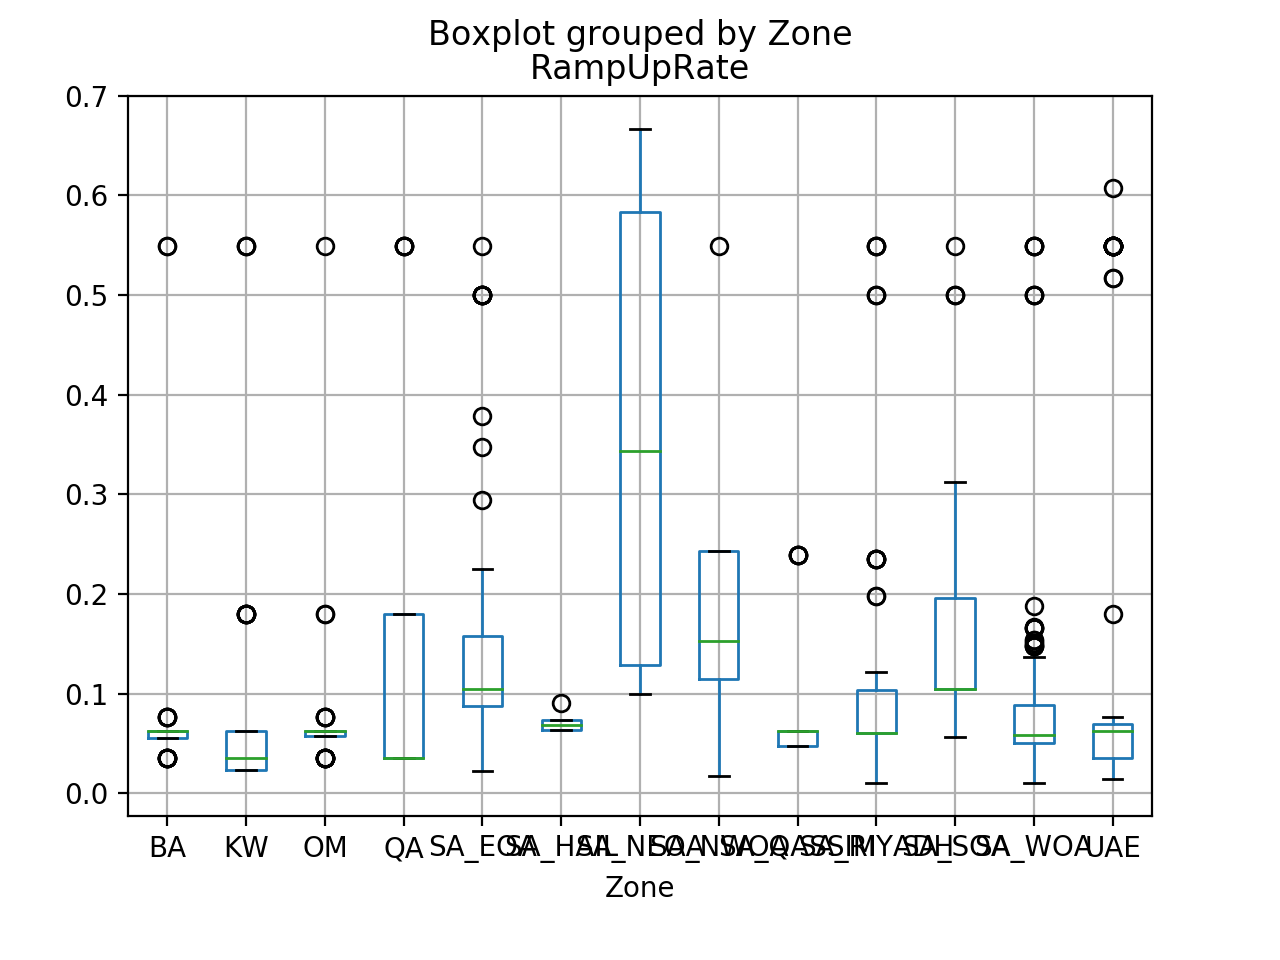

In [75]:
inputs['units'].boxplot(column='RampUpRate', by='Zone')

<IPython.core.display.Javascript object>


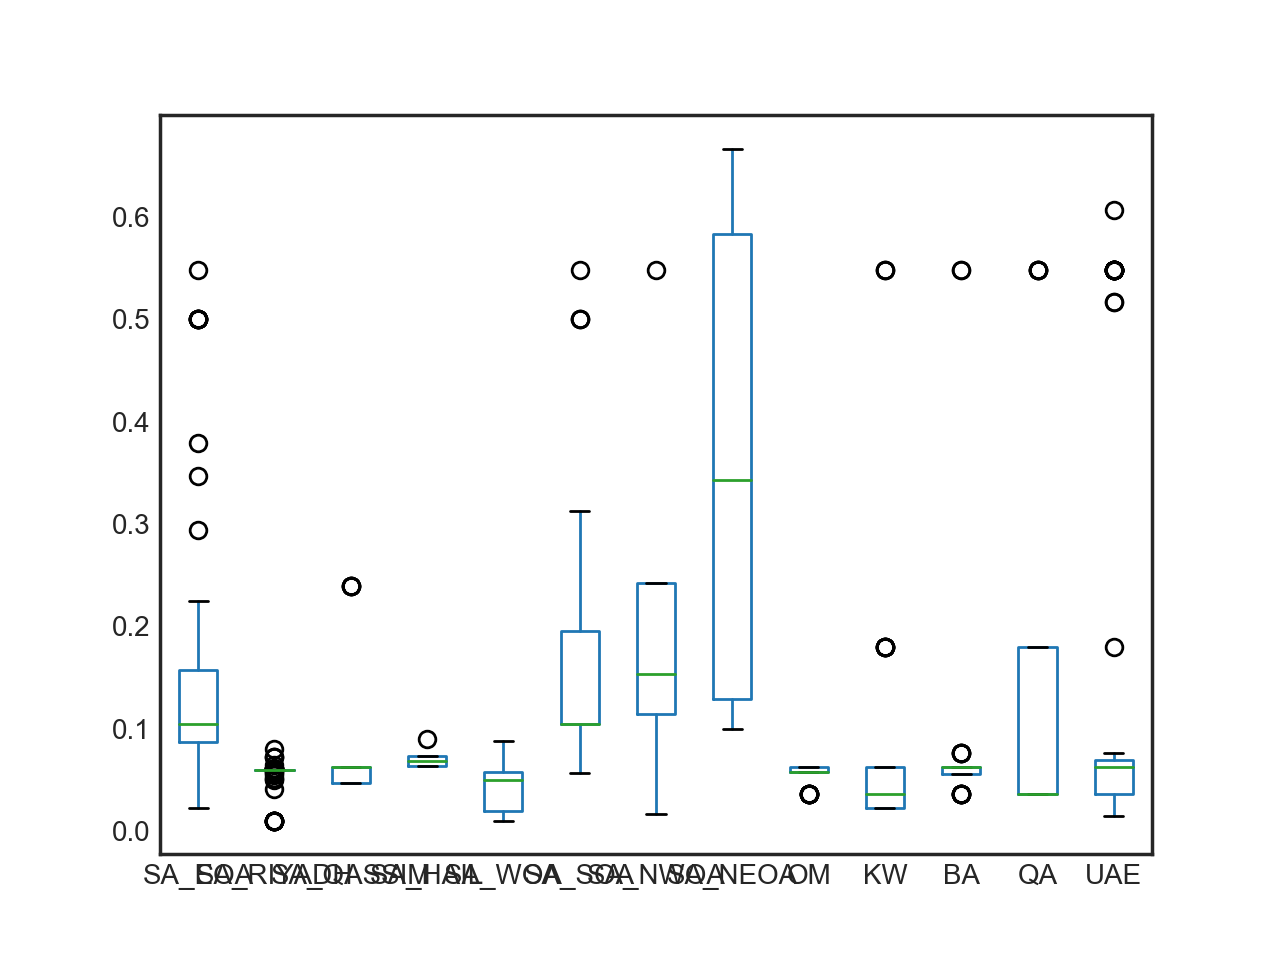

In [346]:
UnitsRampingRate2 = pd.DataFrame(columns=list(inputs['config']['countries']))
groupedDF = inputs['units'].groupby(['Zone','RampUpRate'])['PowerCapacity'].count()   #sum() for MW and count() for unit numbers
for zone in inputs['config']['countries']:
    tmp = pd.DataFrame()
    tmp1= pd.DataFrame()
    for i in range(len(groupedDF[zone])):
        tmp1 = pd.DataFrame({zone:np.array([groupedDF[zone].index[i]]*int(round(groupedDF[zone].iloc[i])))})
        tmp = pd.concat([tmp,tmp1],axis=0, ignore_index=True)
    UnitsRampingRate2[zone] = tmp
UnitsRampingRate2.plot.box();


<IPython.core.display.Javascript object>


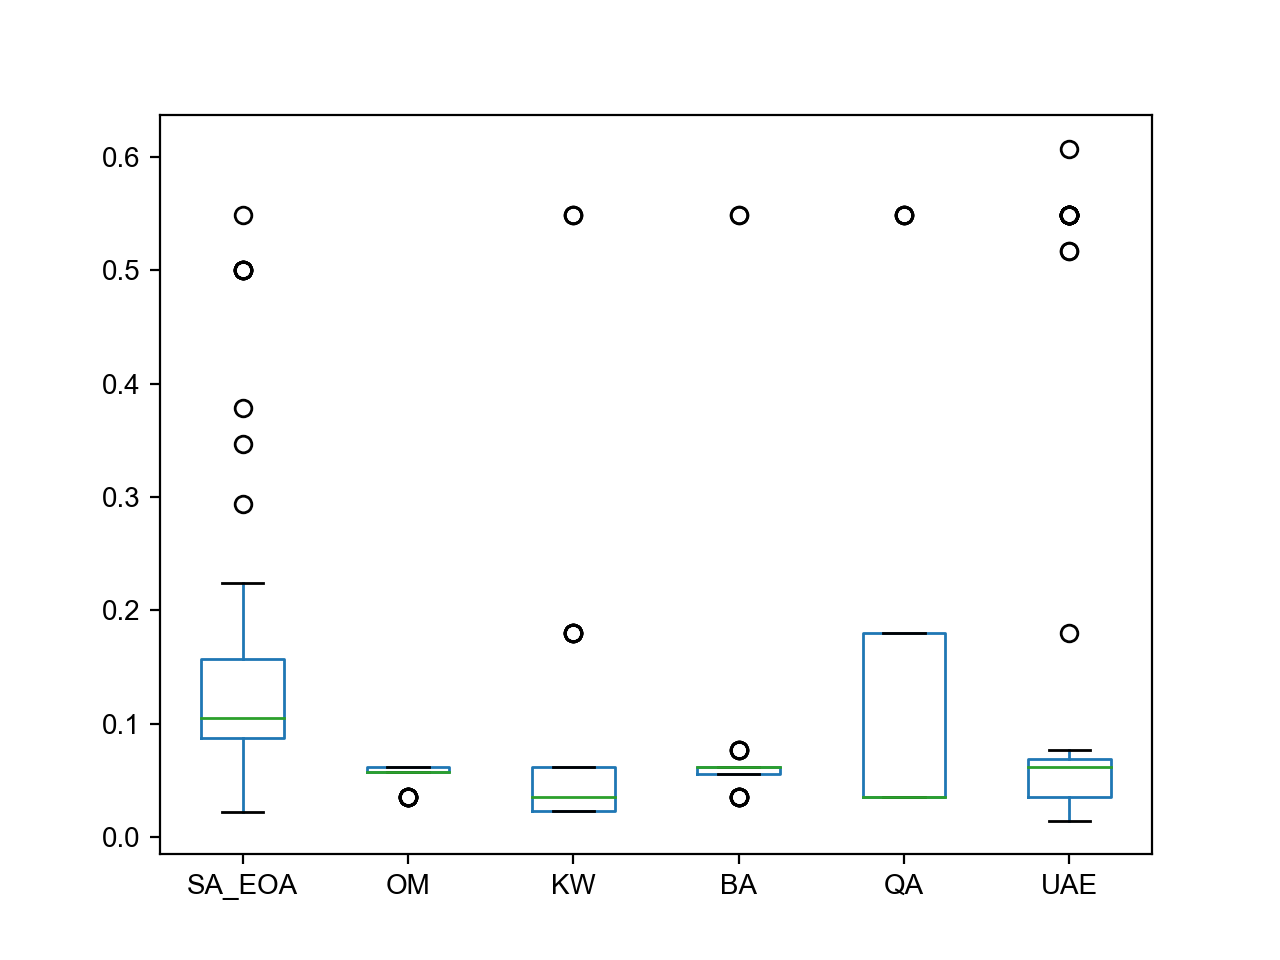

In [77]:

UnitsRampingRate2.drop(columns=['SA_RIYADH', 'SA_QASSIM', 'SA_HAIL', 'SA_WOA', 'SA_SOA', 'SA_NWOA', 'SA_NEOA','SA_NEOA' ]).plot.box();


In [ ]:

UnitsRampingRate2.drop(columns=['BA', 'QA', 'OM', 'KW', 'UAE']).plot.box();


In [78]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

plt.figure()
plt.boxplot([UnitsRampingRate2['SA_EOA'], UnitsRampingRate2['SA_RIYADH'], UnitsRampingRate2['SA_QASSIM'], UnitsRampingRate2['SA_HAIL'], UnitsRampingRate2['SA_WOA'], UnitsRampingRate2['SA_SOA'], UnitsRampingRate2['SA_NWOA'], UnitsRampingRate2['SA_NEOA'] ], whis='range')
# overlay axis on top of another 
ax2 = mpl_il.inset_axes(plt.gca(), width='60%', height='40%', loc=2)
ax2.hist(UnitsRampingRate2['SA_EOA'], bins=100)
ax2.margins(x=0.9)

<IPython.core.display.Javascript object>

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/numpy/lib/function_base.py:4274: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/cbook/__init__.py:1856: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/cbook/__init__.py:1863: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/cbook/__init__.py:1871: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/cbook/__init__.py:1872: RuntimeWarning: invalid value encountered in greater
  np.compress(x >

<IPython.core.display.Javascript object>


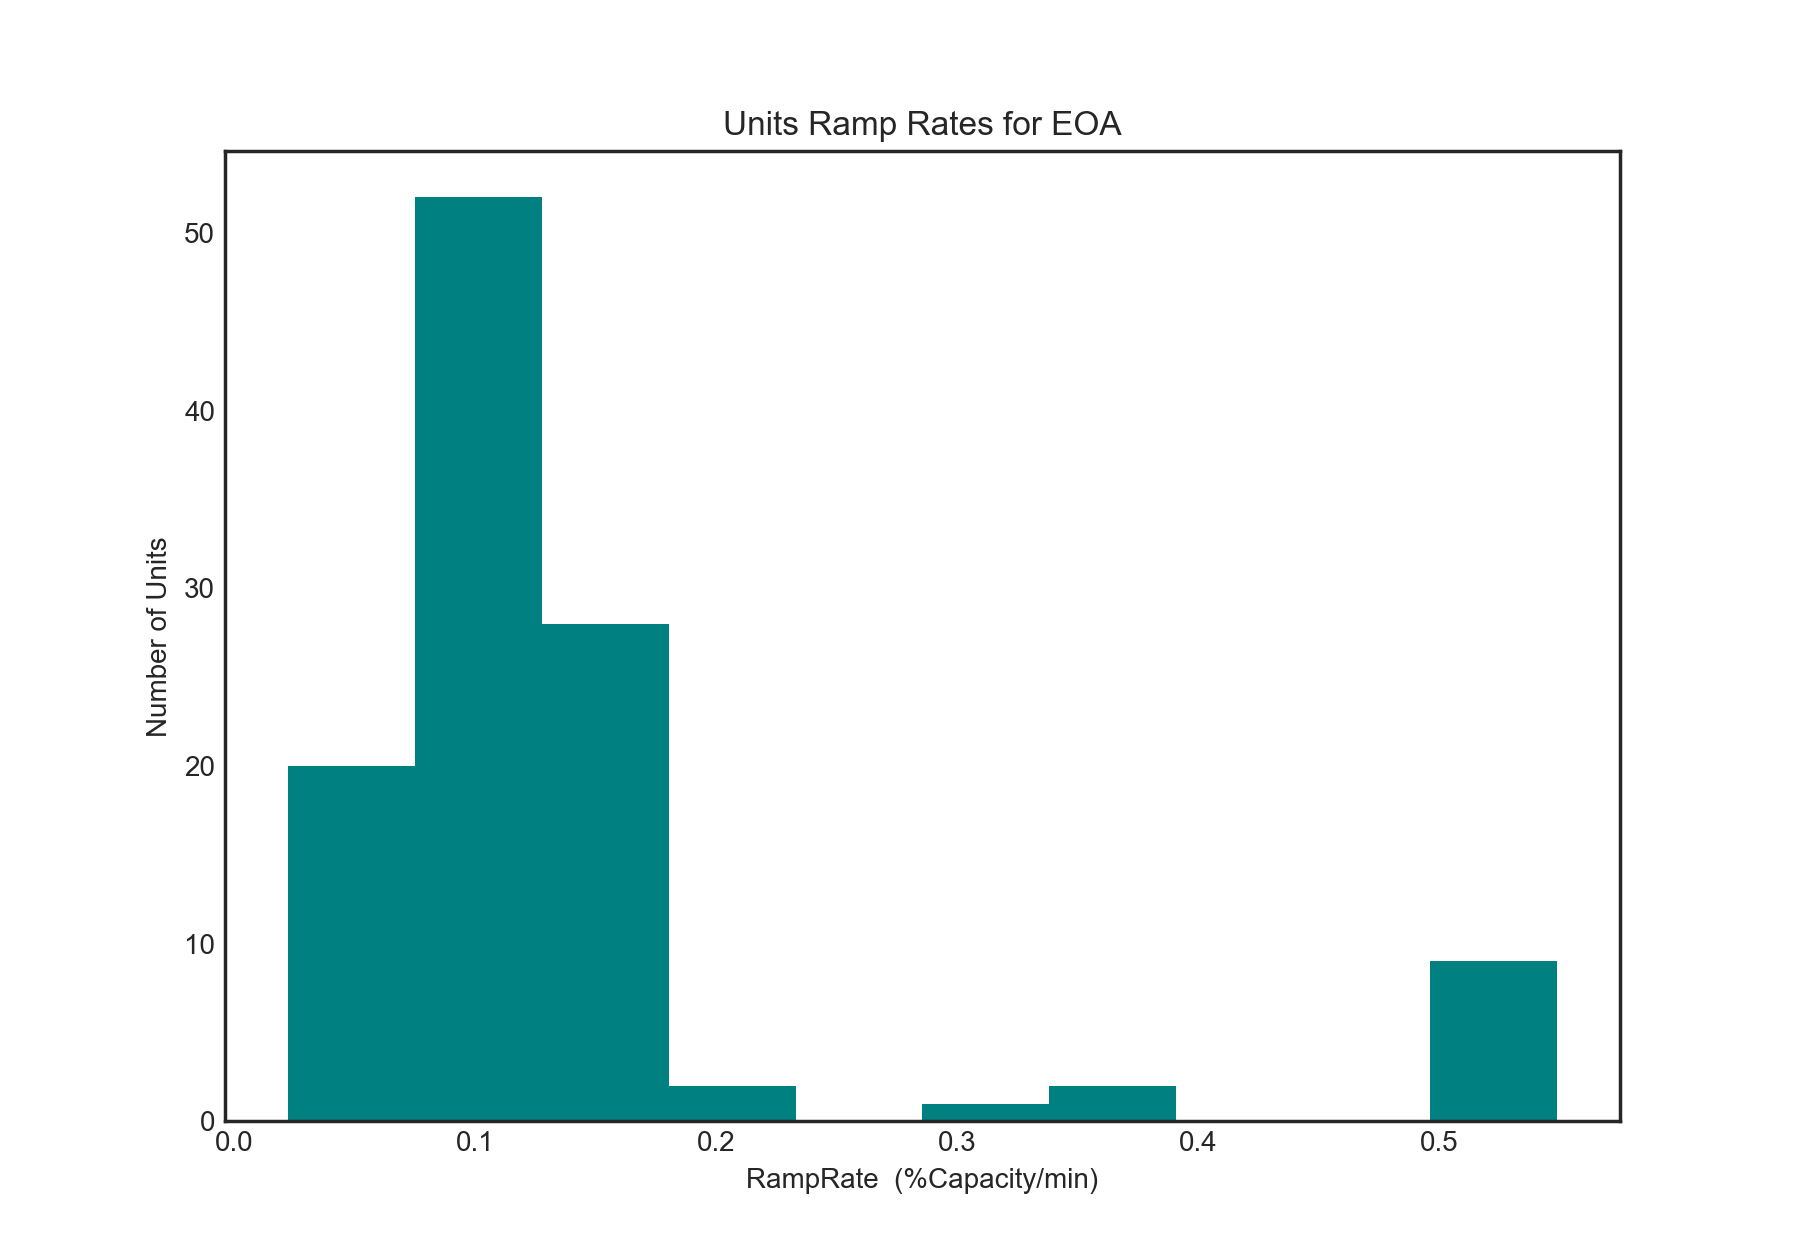

Text(0,0.5,u'Number of Units')

In [347]:
plt.figure()
_ = plt.hist(UnitsRampingRate2['SA_EOA'], bins=10, color='Teal')
plt.title('Units Ramp Rates for EOA')
plt.xlabel("RampRate  (%Capacity/min)")
plt.ylabel("Number of Units")

<IPython.core.display.Javascript object>


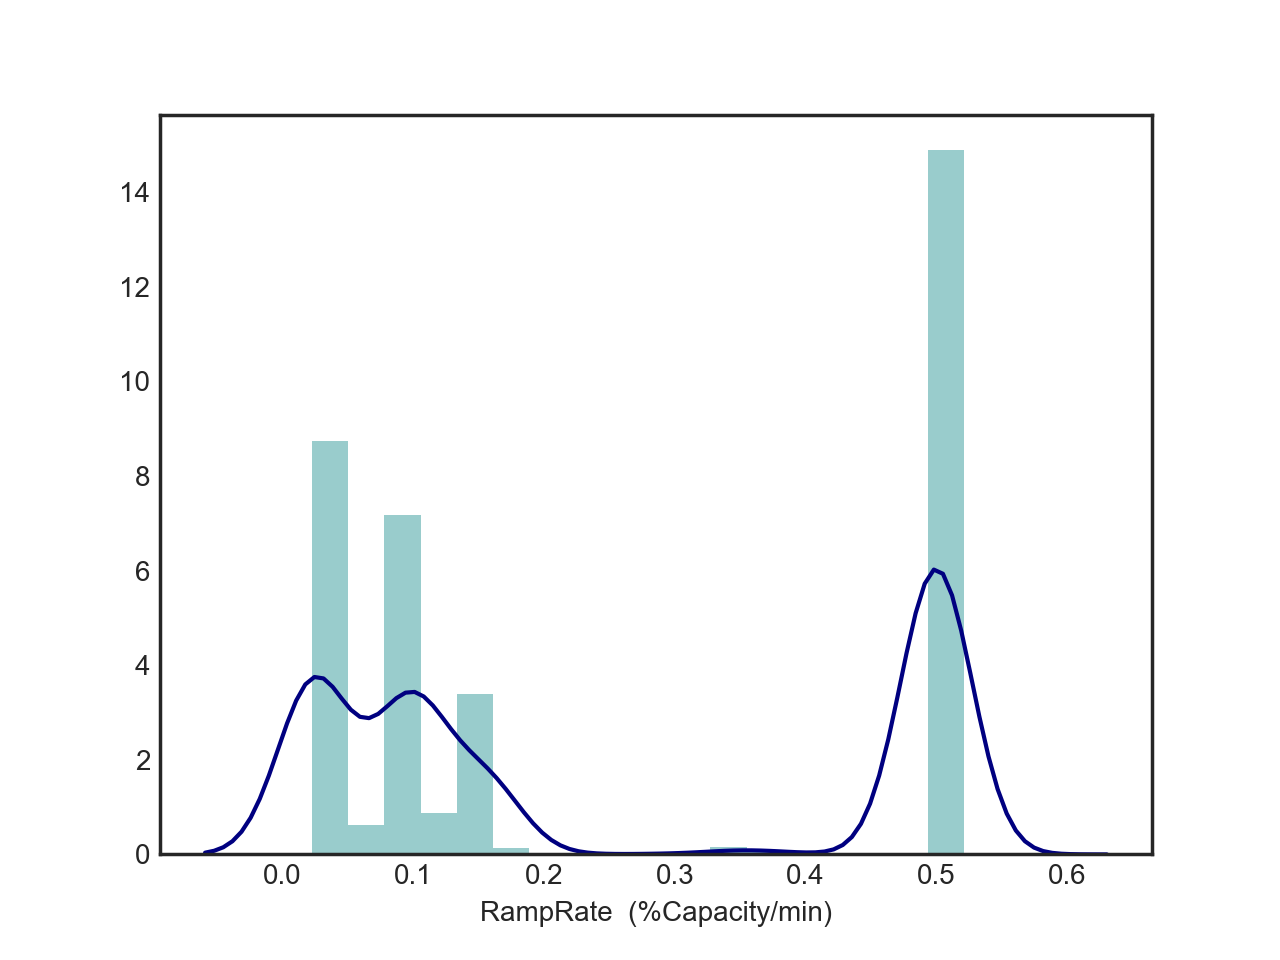

Text(0.5,0,u'RampRate  (%Capacity/min)')

In [335]:
plt.figure()
# we can pass keyword arguments for each individual component of the plot
ax = sns.distplot(UnitsRampingRate2['SA_EOA'], hist_kws={'color': 'Teal'}, kde_kws={'color': 'Navy'});
ax.set_xlabel("RampRate  (%Capacity/min)")

<IPython.core.display.Javascript object>


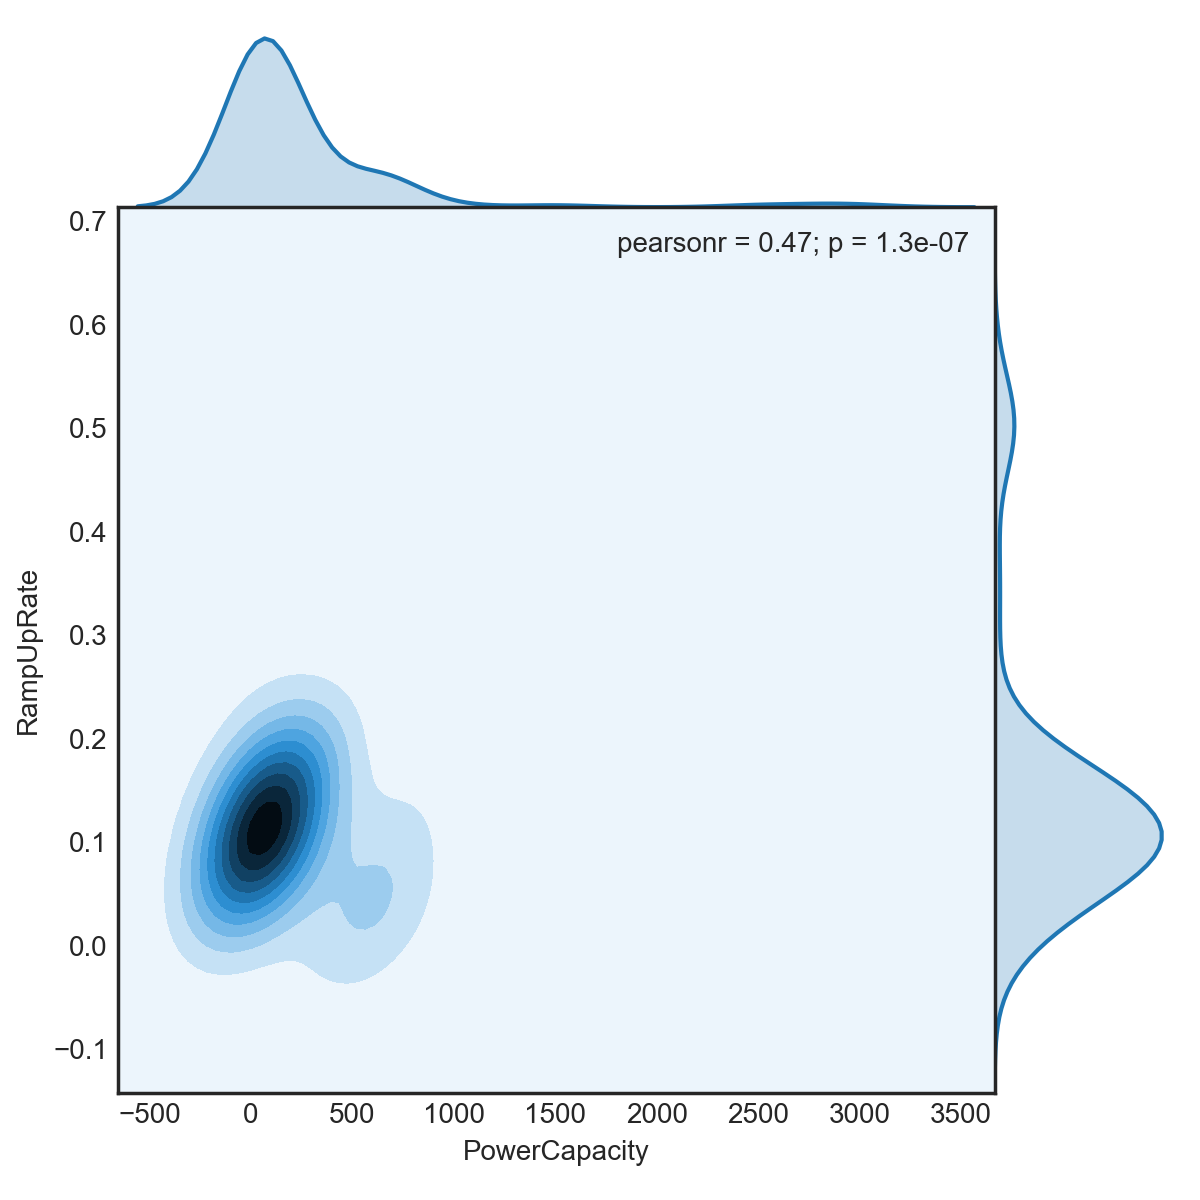

In [80]:
# set the seaborn style for all the following plots
sns.set_style('white')

ZoneUnitsCapacity=inputs['units']['PowerCapacity'][inputs['units']['Zone']=='SA_EOA']
ZoneUnitsRamprates=inputs['units']['RampUpRate'][inputs['units']['Zone']=='SA_EOA']
sns.jointplot(ZoneUnitsCapacity, ZoneUnitsRamprates, kind='kde', space=0);


In [ ]:
ZoneUnitsCapacity=inputs['units']['PowerCapacity'][inputs['units']['Zone']=='SA_EOA']
ZoneUnitsRamprates=inputs['units']['RampUpRate'][inputs['units']['Zone']=='SA_EOA']

sns.jointplot(ZoneUnitsCapacity, ZoneUnitsRamprates, kind='hex');


In [298]:
#ZoneUnits=inputs['units'][inputs['units']['Zone']=='SA_EOA']
ZoneUnits=inputs['units']
COLORS = {'STUR': 'slateblue', 'GTUR': 'aqua', 'COMC': 'grey', 'ICEN': 'lightcoral',
          'MSW': 'dodgerblue', 'CPV': 'yellow', 'WTON': 'red', 'PHOT': 'greenyellow',
          'CSP': 'green', 'LFGG': 'khaki'}

g = sns.JointGrid(x="PowerCapacity", y="RampUpRate", data=ZoneUnits);
for tech in ZoneUnits['Technology'].unique():
    tmp = ZoneUnits[ZoneUnits['Technology']==tech]
    tmp_color = COLORS[tech]
    sns.regplot(tmp.PowerCapacity, tmp.RampUpRate, color=tmp_color,scatter=True, fit_reg=False, ax=g.ax_joint, scatter_kws={'s':20}, label=tech).legend(loc=tech)
sns.distplot(ZoneUnits.PowerCapacity, kde=False,  ax=g.ax_marg_x)

sns.distplot(ZoneUnits.RampUpRate, kde=False,  ax=g.ax_marg_y, vertical=True)

#g.fig.set_figwidth(20)
#g.fig.set_figheight(15)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


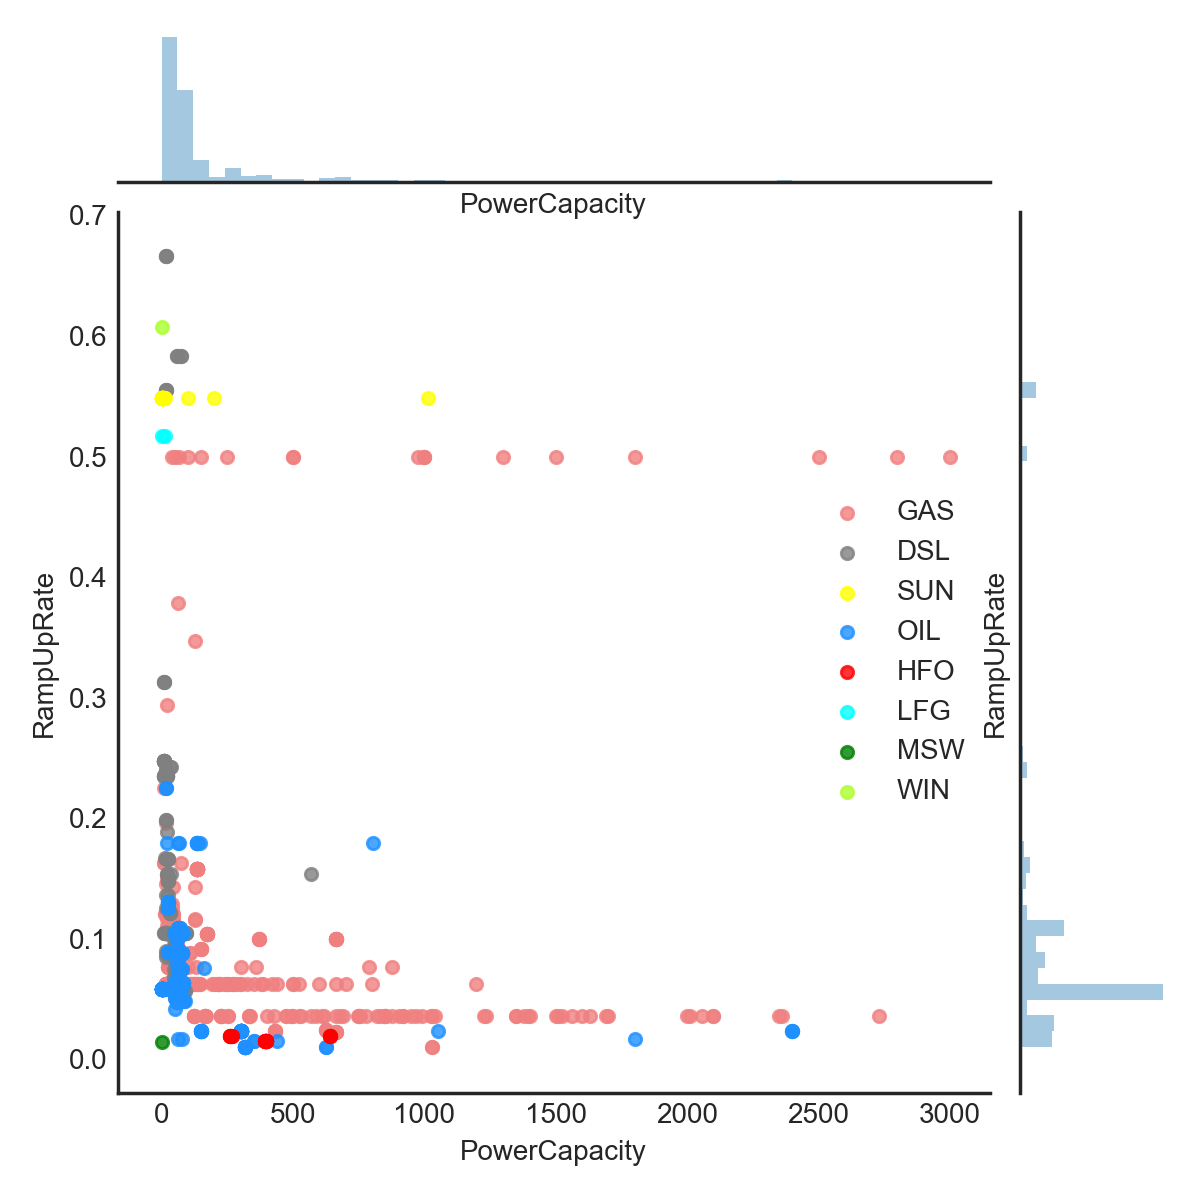

In [301]:
#ZoneUnits=inputs['units'][inputs['units']['Zone']=='SA_EOA']
ZoneUnits=inputs['units']
COLORS = {'NUC': 'slateblue', 'LFG': 'aqua', 'DSL': 'grey', 'GAS': 'lightcoral',
          'OIL': 'dodgerblue', 'SUN': 'yellow', 'HFO': 'red', 'WIN': 'greenyellow',
          'MSW': 'green'}

g = sns.JointGrid(x="PowerCapacity", y="RampUpRate", data=ZoneUnits);
for tech in ZoneUnits['Fuel'].unique():
    tmp = ZoneUnits[ZoneUnits['Fuel']==tech]
    tmp_color = COLORS[tech]
    sns.regplot(tmp.PowerCapacity, tmp.RampUpRate, color=tmp_color,scatter=True, fit_reg=False, ax=g.ax_joint, scatter_kws={'s':20}, label=tech).legend(loc=tech)
sns.distplot(ZoneUnits.PowerCapacity, kde=False,  ax=g.ax_marg_x)

sns.distplot(ZoneUnits.RampUpRate, kde=False,  ax=g.ax_marg_y, vertical=True)

#g.fig.set_figwidth(20)
#g.fig.set_figheight(15)
plt.show()

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pand

<IPython.core.display.Javascript object>


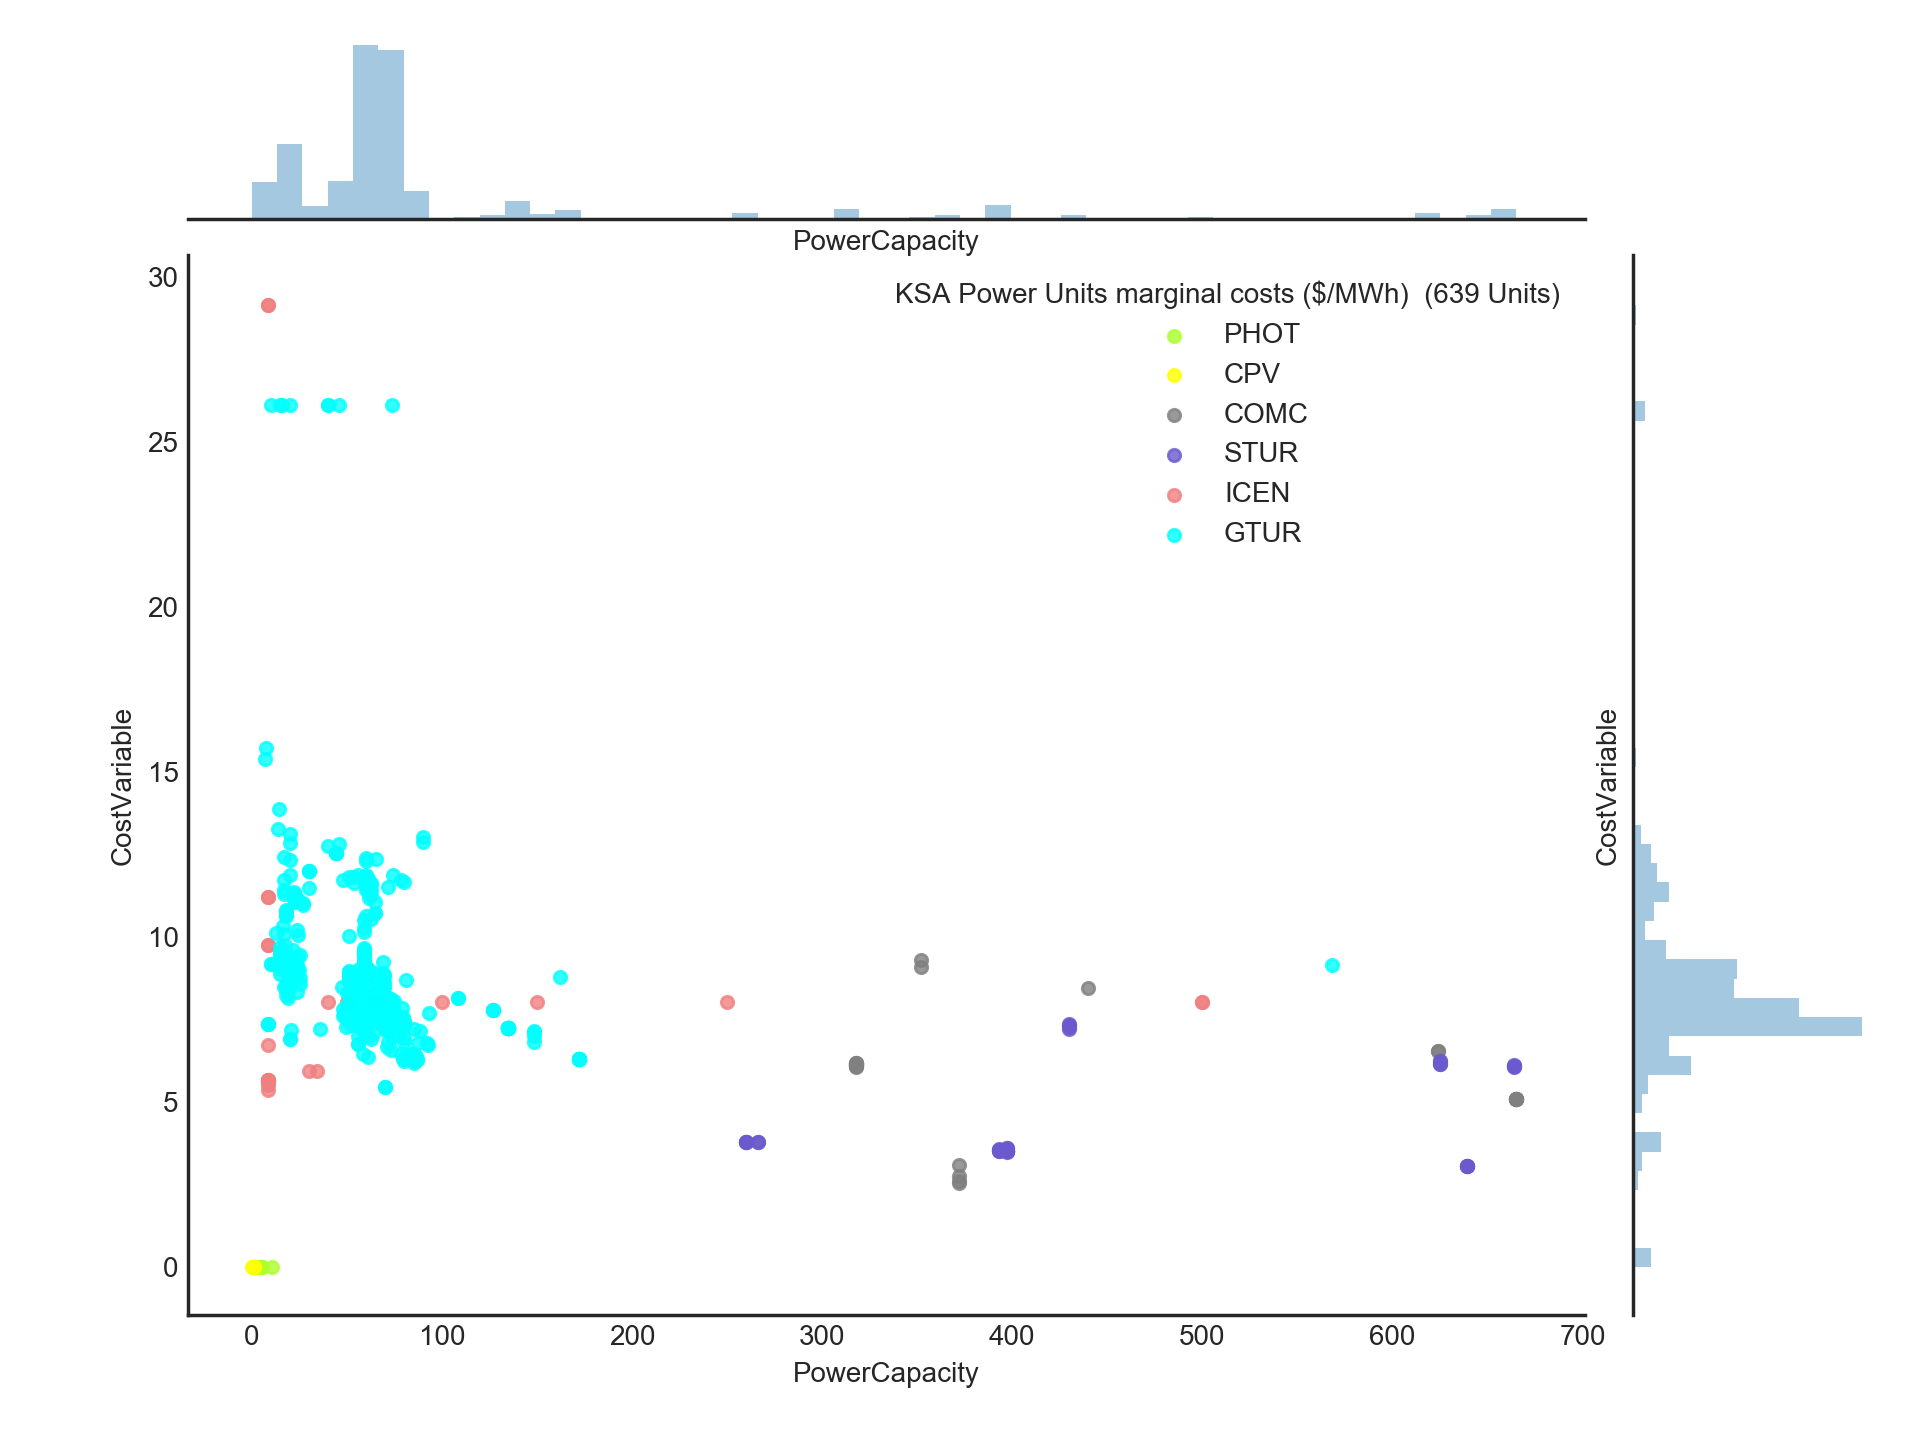

638


In [327]:
ZoneUnits=post.get_sorted_units(inputs, results, zone='All', sortby='CostVariable', ascending=True)
ZoneUnits=ZoneUnits.ix[ZoneUnits['PowerCapacity'] < 900]
ZoneUnits=ZoneUnits.ix[ZoneUnits['Zone'] != 'BA']
ZoneUnits=ZoneUnits.ix[ZoneUnits['Zone'] != 'QA']
ZoneUnits=ZoneUnits.ix[ZoneUnits['Zone'] != 'KW']
ZoneUnits=ZoneUnits.ix[ZoneUnits['Zone'] != 'OM']
ZoneUnits=ZoneUnits.ix[ZoneUnits['Zone'] != 'UAE']
COLORS = {'STUR': 'slateblue', 'GTUR': 'aqua', 'COMC': 'grey', 'ICEN': 'lightcoral',
          'MSW': 'dodgerblue', 'CPV': 'yellow', 'WTON': 'red', 'PHOT': 'greenyellow',
          'CSP': 'green', 'LFGG': 'khaki'}

g = sns.JointGrid(x="PowerCapacity", y="CostVariable", data=ZoneUnits);
for tech in ZoneUnits['Technology'].unique():
    tmp = ZoneUnits[ZoneUnits['Technology']==tech]
    tmp_color = COLORS[tech]
    sns.regplot(tmp.PowerCapacity, tmp.CostVariable, color=tmp_color,scatter=True, fit_reg=False, ax=g.ax_joint, scatter_kws={'s':20}, label=tech).legend(loc=tech).set_title('KSA Power Units marginal costs ($/MWh)  (639 Units)')
sns.distplot(ZoneUnits.PowerCapacity, kde=False,  ax=g.ax_marg_x)

sns.distplot(ZoneUnits.CostVariable, kde=False,  ax=g.ax_marg_y, vertical=True)

#g.fig.set_figwidth(20)
#g.fig.set_figheight(15)
print len(ZoneUnits)
plt.show()

<IPython.core.display.Javascript object>


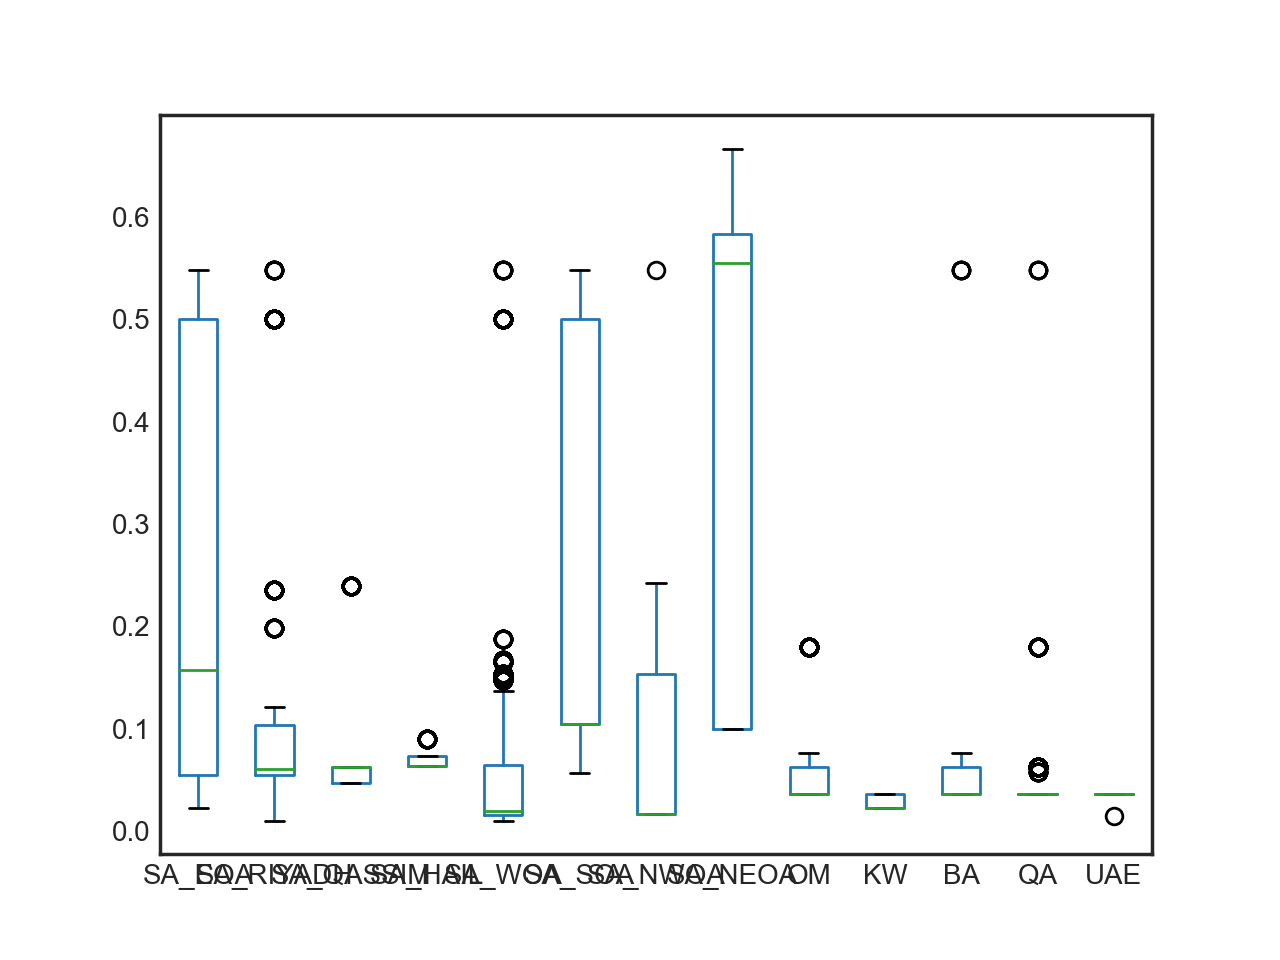

In [84]:
#inputs['units'].groupby(['Zone','RampUpRate'])['PowerCapacity'].agg(lambda x: x.count())      
#inputs['units'].groupby(['Zone','RampUpRate'])['PowerCapacity'].sum()['BA'].iloc[0]
UnitsRampingRate = pd.DataFrame(columns=list(inputs['config']['countries']))
groupedDF = inputs['units'].groupby(['Zone','RampUpRate'])['PowerCapacity'].sum()   #sum() for MW and count() for unit numbers
for zone in inputs['config']['countries']:
    tmp = pd.DataFrame()
    tmp1= pd.DataFrame()
    for i in range(len(groupedDF[zone])):
        tmp1 = pd.DataFrame({zone:np.array([groupedDF[zone].index[i]]*int(round(groupedDF[zone].iloc[i])))})
        tmp = pd.concat([tmp,tmp1],axis=0, ignore_index=True)
    UnitsRampingRate[zone] = tmp
UnitsRampingRate.plot.box();

<IPython.core.display.Javascript object>


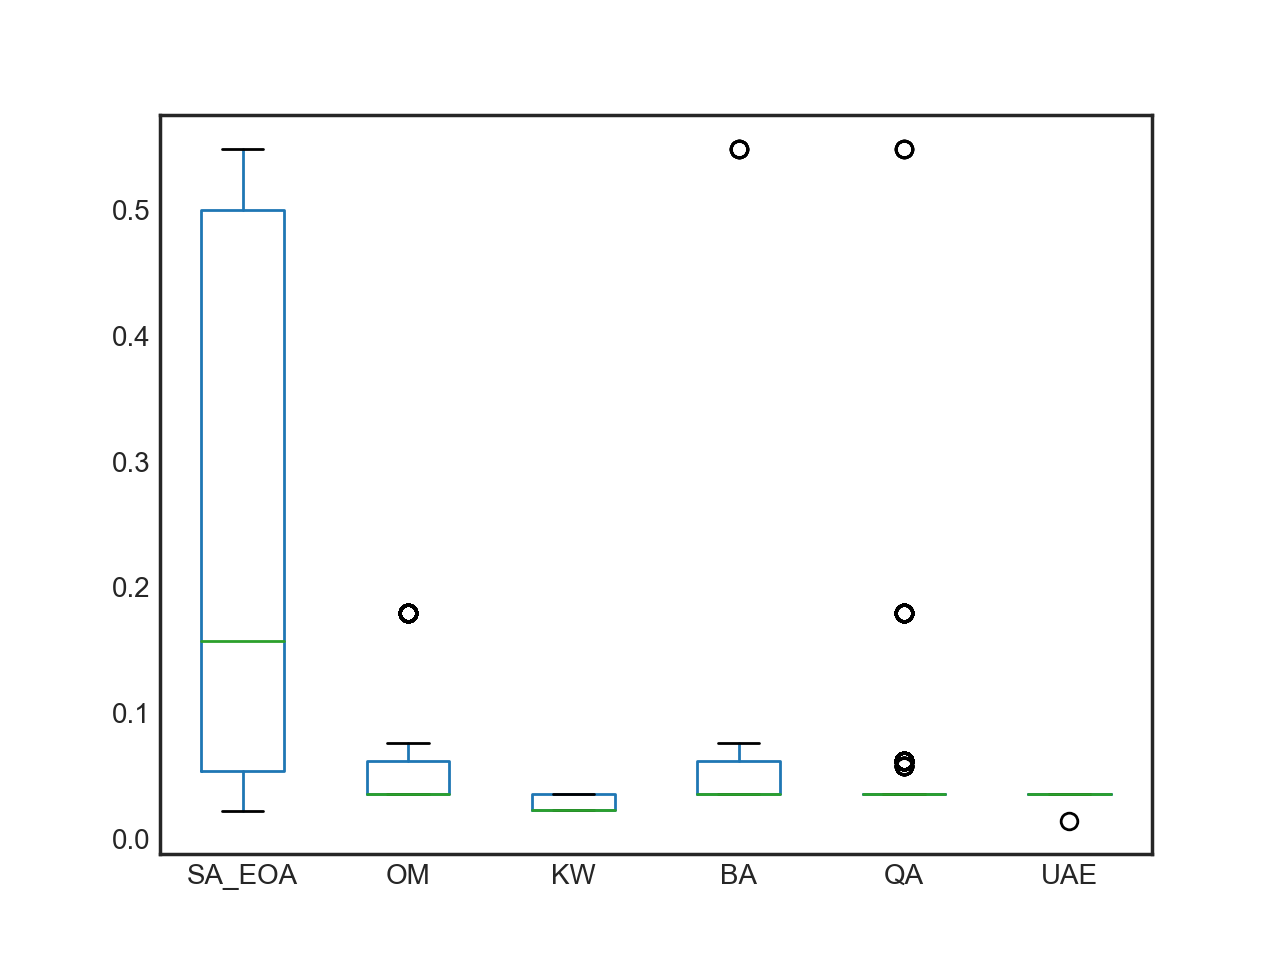

In [85]:
UnitsRampingRate.drop(columns=['SA_RIYADH', 'SA_QASSIM', 'SA_HAIL', 'SA_WOA', 'SA_SOA', 'SA_NWOA', 'SA_NEOA','SA_NEOA' ]).plot.box();


<IPython.core.display.Javascript object>


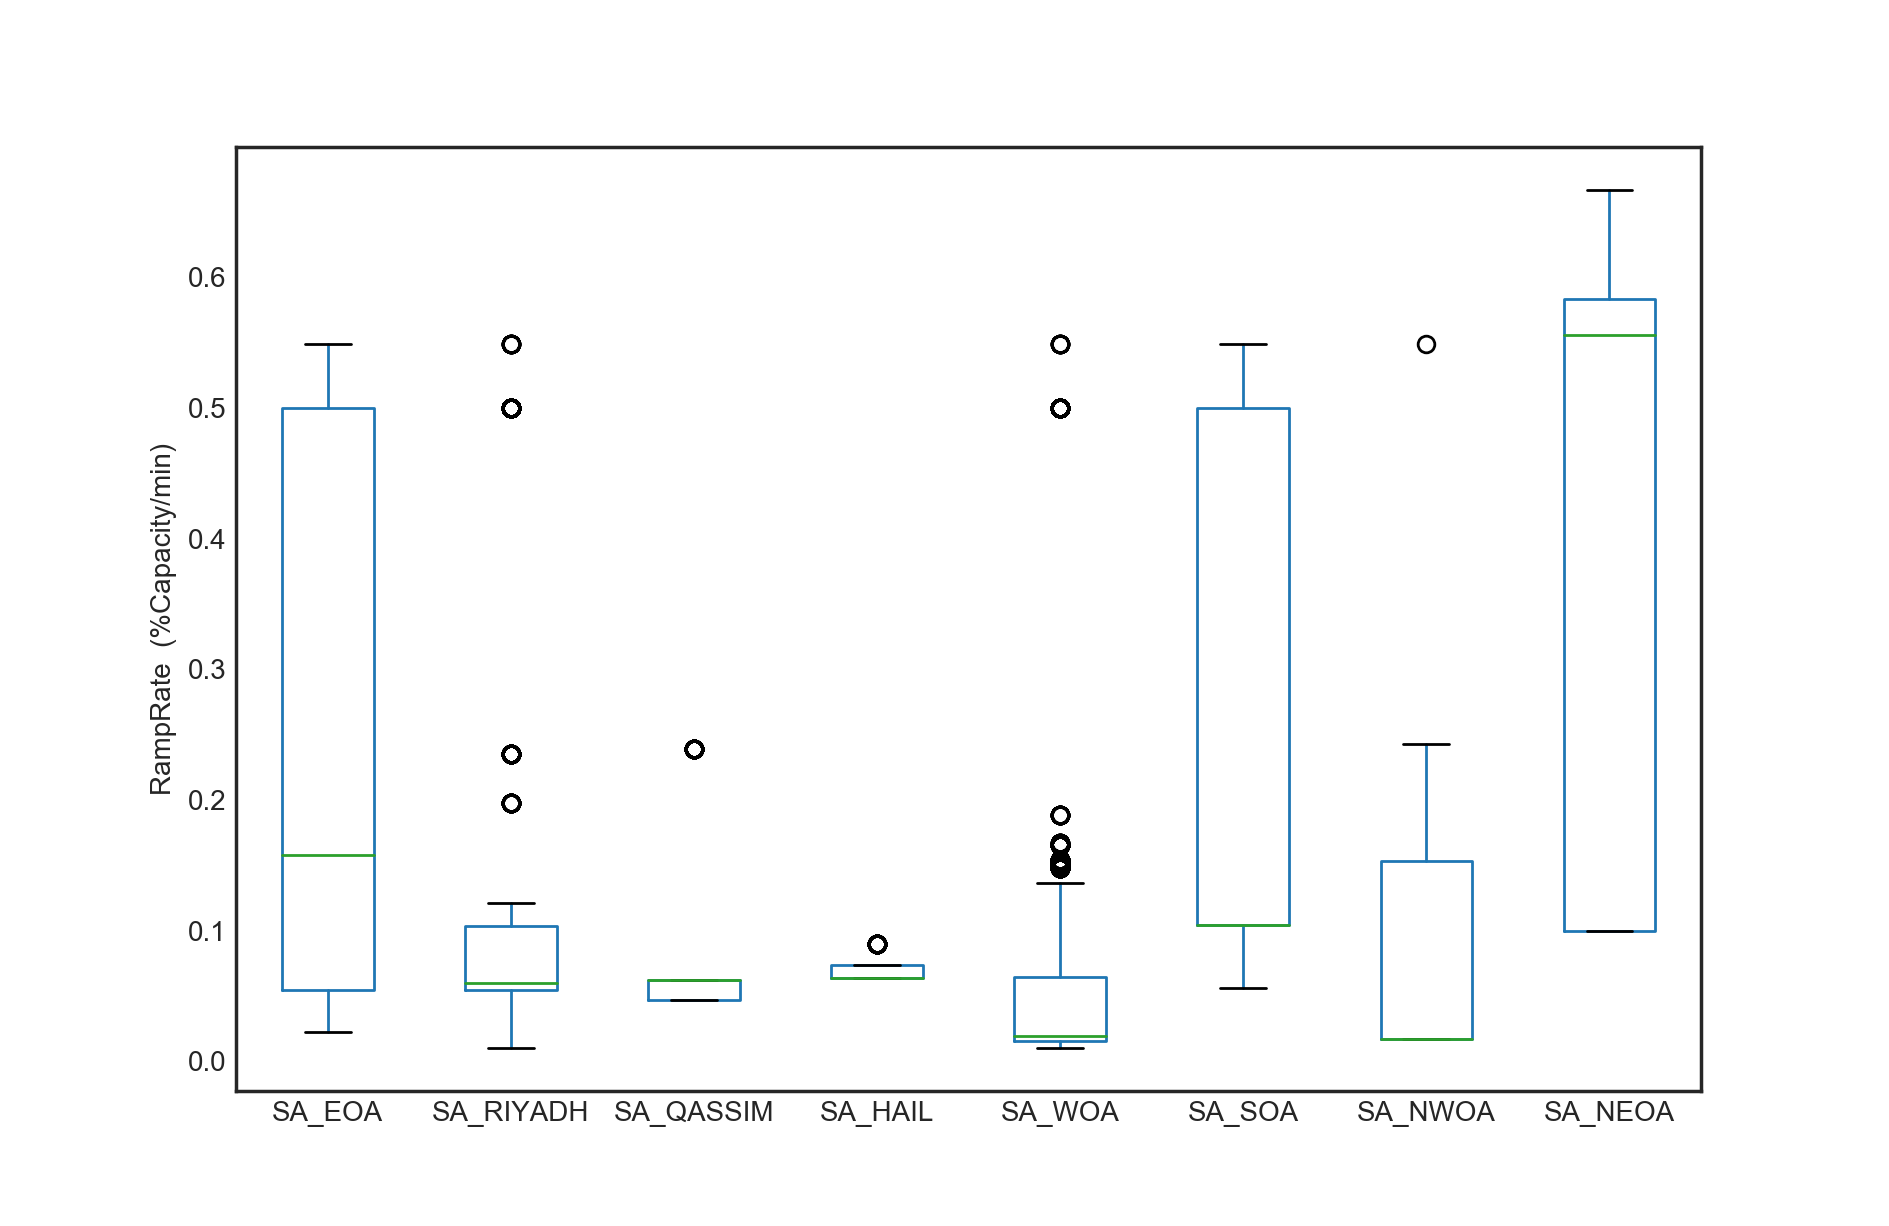

Text(0,0.5,u'RampRate  (%Capacity/min)')

In [323]:

ax = UnitsRampingRate.drop(columns=['BA', 'QA', 'OM', 'KW', 'UAE']).plot.box();
ax.set_ylabel("RampRate  (%Capacity/min)")


In [87]:
inputs['units']['PowerCapacity'][inputs['units']['Zone']=='SA_EOA']


[0] - Ghazlan GT-01                         430.0
[1] - Ghazlan GT-02                         430.0
[2] - Ghazlan GT-03                         430.0
[3] - Ghazlan GT-04                         430.0
[4] - Ghazlan GT-05                         664.0
[5] - Ghazlan GT-06                         664.0
[6] - Ghazlan GT-07                         664.0
[7] - Ghazlan GT-08                         664.0
[8] - Qurrayah ST-01                        625.0
[9] - Qurrayah ST-02                        625.0
[10] - Qurrayah ST-03                       625.0
[11] - Qurrayah ST-04                       625.0
[12] - Qurrayah GT-01                       135.0
[13] - Qurrayah GT-02                       135.0
[14] - Qurrayah GT-03                       135.0
[15] - Qurrayah GT-04                       135.0
[16] - Qurrayah GT-05                       135.0
[17] - Qurrayah GT-06                       135.0
[18] - Qurrayah GT-07                       135.0
[19] - Qurrayah GT-08                       135.0
